In [1]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualisation
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

# Stats packages
import statsmodels.api as sm

# For Machine Learning
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


c:\Users\Store\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv("Data\MockDataSet1_Cleaned.csv")
df

,QuoteRef,Channel,Product,Smoker,Joint?,Person1 Age,Term,TotalPremium,NBC,Sold,JF (Score),WGB (No. of other addresses held),X (Months same person on ER at current address),EF (No. of people not same surname at current address),NOB (Property group),URB (Income group),LSB (Regional banded house price band),BB (Number of CCJs),ND (Months since last CCJ)
0,QPCW-43,CTM,Level,1.0,1.0,38.0,20,36.22,1116.22,0.0,477.0,NaN,NaN,NaN,17.0,7.0,5.0,NaN,NaN
1,XXHO-52,CTM,Level accelerated,1.0,0.0,47.0,10,29.36,673.04,0.0,562.0,3.0,NaN,3.0,9.0,8.0,4.0,0.0,NaN
2,KTGM-13,Direct,Decreasing with CI,0.0,1.0,47.0,10,20.00,452.07,0.0,472.0,8.0,21.0,4.0,9.0,7.0,4.0,2.0,12.0
3,LKFU-15,MSM,Level with CI,1.0,0.0,37.0,5,20.00,452.07,0.0,472.0,8.0,21.0,4.0,9.0,7.0,4.0,2.0,12.0
4,OZIK-66,Direct,Level with CI,0.0,1.0,35.0,20,22.41,572.16,0.0,563.0,2.0,NaN,2.0,17.0,5.0,3.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,EQIE-29,CTM,Level accelerated,1.0,1.0,41.0,20,19.80,479.64,0.0,589.0,0.0,157.0,3.0,14.0,4.0,5.0,0.0,NaN
2740,GUZK-85,Direct,Level,1.0,1.0,41.0,5,17.07,477.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2741,ZEFY-74,CTM,Level accelerated,1.0,0.0,49.0,30,62.69,1878.51,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2742,HLVT-14,CTM,Level with CI,0.0,0.0,47.0,10,62.69,1878.51,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
numeric_feats = [
    "Person1 Age",
    "Term",
    "TotalPremium",
    "WGB (No. of other addresses held)",
    "JF (Score)",
    "X (Months same person on ER at current address)",
    "EF (No. of people not same surname at current address)",
    "BB (Number of CCJs)",
    "ND (Months since last CCJ)",
    "NBC"
]

categorical_feats = [
    "Channel",
    "Product",
    "NOB (Property group)",
    "URB (Income group)",
    "LSB (Regional banded house price band)",
] 

binary_feats = [
    "Smoker",
    "Joint?",
    "Sold"
]


all_feats = numeric_feats + categorical_feats + binary_feats
print(len(all_feats))

set(df.columns) - set(all_feats)

18


{'QuoteRef'}

In [5]:
simple_imputer = ColumnTransformer(
    [
        ("numeric", SimpleImputer(strategy="median", add_indicator=True), numeric_feats),
        ("categorical", SimpleImputer(strategy="constant", fill_value="missing"), categorical_feats),
        ("binary", SimpleImputer(strategy="most_frequent", add_indicator=True), binary_feats)
    ],
    remainder="drop",  
    verbose_feature_names_out=False 
).set_output(transform="pandas")

encoder = ColumnTransformer(
    transformers = [
        ('pass', 'passthrough', numeric_feats + binary_feats),
        ('ordinal', ce.OneHotEncoder(handle_missing="return_nan"), categorical_feats)
    ],
    remainder="drop",
    verbose_feature_names_out=False
).set_output(transform="pandas")

scaler = StandardScaler().set_output(transform="pandas")

prep_pipeline = Pipeline(
    [
        ("imputation", simple_imputer),
        ("encoding", encoder),
        ("scaling", scaler)
    ]
)


df = prep_pipeline.fit_transform(df)
df

,Person1 Age,Term,TotalPremium,WGB (No. of other addresses held),JF (Score),X (Months same person on ER at current address),EF (No. of people not same surname at current address),BB (Number of CCJs),ND (Months since last CCJ),NBC,...,LSB (Regional banded house price band)_2,LSB (Regional banded house price band)_3,LSB (Regional banded house price band)_4,LSB (Regional banded house price band)_5,LSB (Regional banded house price band)_6,LSB (Regional banded house price band)_7,LSB (Regional banded house price band)_8,LSB (Regional banded house price band)_9,LSB (Regional banded house price band)_10,LSB (Regional banded house price band)_11
0,-0.765647,-0.075194,0.085745,-0.232899,-3.784159,-0.231750,-0.153916,-0.145503,0.030531,0.289953,...,-0.281141,-0.308884,-0.635280,-0.311003,-0.306755,-0.251304,-0.256186,-0.27735,-0.232741,-0.219382
1,0.332977,-1.196563,-0.097320,0.277952,0.269807,-0.231750,-0.747933,-0.145503,0.030531,-0.144752,...,3.556929,-0.308884,-0.635280,-0.311003,-0.306755,-0.251304,-0.256186,-0.27735,-0.232741,-0.219382
2,0.332977,-1.196563,-0.347099,2.832208,-4.022627,-0.387537,-0.549927,8.172399,-8.483304,-0.361496,...,3.556929,-0.308884,-0.635280,-0.311003,-0.306755,-0.251304,-0.256186,-0.27735,-0.232741,-0.219382
3,-0.887716,-1.757247,-0.347099,2.832208,-4.022627,-0.387537,-0.549927,8.172399,-8.483304,-0.361496,...,3.556929,-0.308884,-0.635280,-0.311003,-0.306755,-0.251304,-0.256186,-0.27735,-0.232741,-0.219382
4,-1.131855,-0.075194,-0.282786,-0.232899,0.317500,-0.231750,-0.945938,-0.145503,0.030531,-0.243703,...,-0.281141,3.237464,-0.635280,-0.311003,-0.306755,-0.251304,-0.256186,-0.27735,-0.232741,-0.219382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2739,-0.399439,-0.075194,-0.352436,-1.254601,1.557537,3.849871,-0.747933,-0.145503,0.030531,-0.334454,...,-0.281141,-0.308884,-0.635280,-0.311003,-0.306755,-0.251304,-0.256186,-0.27735,-0.232741,-0.219382
2740,-0.399439,-1.757247,-0.425288,-0.232899,0.174419,-0.231750,-0.153916,-0.145503,0.030531,-0.336994,...,-0.281141,-0.308884,1.574109,-0.311003,-0.306755,-0.251304,-0.256186,-0.27735,-0.232741,-0.219382
2741,0.577116,1.046175,0.792118,-0.232899,0.174419,-0.231750,-0.153916,-0.145503,0.030531,1.037666,...,-0.281141,-0.308884,1.574109,-0.311003,-0.306755,-0.251304,-0.256186,-0.27735,-0.232741,-0.219382
2742,0.332977,-1.196563,0.792118,-0.232899,0.174419,-0.231750,-0.153916,-0.145503,0.030531,1.037666,...,-0.281141,-0.308884,1.574109,-0.311003,-0.306755,-0.251304,-0.256186,-0.27735,-0.232741,-0.219382


c:\Users\Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

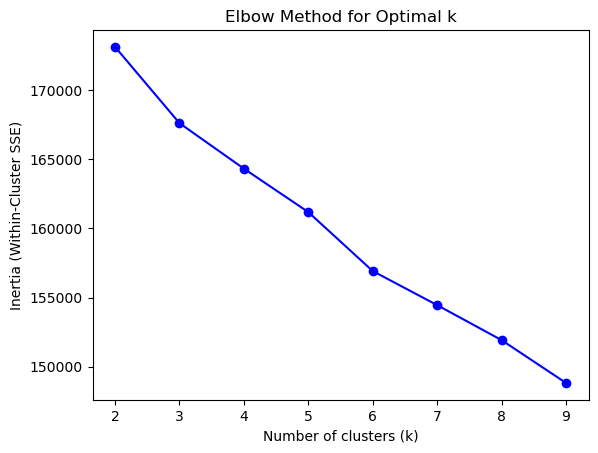

In [6]:
inertias = []
K_range = range(2, 10)  # Try k values from 2 to 9

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df)
df['Cluster'] = cluster_labels
print(df['Cluster'].value_counts())

Cluster
1    1108
0     792
2     516
3     328
Name: count, dtype: int64


c:\Users\Store\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
cluster_means_scaled = (
    df
    .groupby("Cluster")
    .mean()
)

cluster_means_scaled

,Person1 Age,Term,TotalPremium,WGB (No. of other addresses held),JF (Score),X (Months same person on ER at current address),EF (No. of people not same surname at current address),BB (Number of CCJs),ND (Months since last CCJ),NBC,...,LSB (Regional banded house price band)_2,LSB (Regional banded house price band)_3,LSB (Regional banded house price band)_4,LSB (Regional banded house price band)_5,LSB (Regional banded house price band)_6,LSB (Regional banded house price band)_7,LSB (Regional banded house price band)_8,LSB (Regional banded house price band)_9,LSB (Regional banded house price band)_10,LSB (Regional banded house price band)_11
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.014549,0.030996,0.015363,-0.222579,0.121968,-0.202088,-0.206418,-0.145503,0.030531,0.041630,...,-0.281141,-0.308884,1.56574,-0.311003,-0.306755,-0.251304,-0.256186,-0.277350,-0.232741,-0.219382
1,0.020651,-0.048912,-0.171924,-0.041330,-1.250244,0.009781,0.215024,0.496210,-0.325321,-0.168718,...,0.063685,-0.156502,-0.63528,-0.166365,-0.167432,-0.193465,0.832461,0.094256,0.510358,0.461806
2,-0.008529,-0.014139,0.083266,0.206563,0.430373,0.114233,-0.001190,-0.081345,0.119841,0.064798,...,0.112417,0.344391,-0.63528,-0.311003,0.379394,0.339897,-0.142948,0.145470,-0.014904,-0.002610
3,-0.037565,0.047560,-0.047045,-0.089317,0.204898,0.086277,0.161838,-0.145503,0.030531,-0.053239,...,0.195779,-0.161994,-0.63528,1.994727,-0.264546,-0.226271,-0.194653,0.032822,-0.179139,-0.176977


In [13]:
scaler_step = prep_pipeline.named_steps["scaling"]

cluster_means_unscaled_array = scaler_step.inverse_transform(cluster_means_scaled)

cluster_means_unscaled = pd.DataFrame(
    cluster_means_unscaled_array,
    columns=cluster_means_scaled.columns,
    index=cluster_means_scaled.index
)

cluster_means_unscaled


,Person1 Age,Term,TotalPremium,WGB (No. of other addresses held),JF (Score),X (Months same person on ER at current address),EF (No. of people not same surname at current address),BB (Number of CCJs),ND (Months since last CCJ),NBC,...,LSB (Regional banded house price band)_2,LSB (Regional banded house price band)_3,LSB (Regional banded house price band)_4,LSB (Regional banded house price band)_5,LSB (Regional banded house price band)_6,LSB (Regional banded house price band)_7,LSB (Regional banded house price band)_8,LSB (Regional banded house price band)_9,LSB (Regional banded house price band)_10,LSB (Regional banded house price band)_11
Cluster,,,,,,,,,,,,,,,,,,,,,
0,44.391414,20.946970,33.582576,2.020202,558.900253,26.952020,5.734848,0.000000,37.000000,863.055076,...,0.000000,0.000000,0.996212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,44.441406,20.234375,26.564336,2.375000,530.128906,33.751953,7.863281,0.154297,35.955078,648.606309,...,0.089844,0.042969,0.000000,0.041016,0.039062,0.013672,0.261719,0.095703,0.164062,0.142578
2,44.202359,20.544465,36.127087,2.860254,565.366606,37.104356,6.771325,0.015426,37.262250,886.675653,...,0.102541,0.184211,0.000000,0.000000,0.192377,0.139746,0.027223,0.108893,0.048094,0.045372
3,43.964497,21.094675,31.243935,2.281065,560.639053,36.207101,7.594675,0.000000,37.000000,766.337071,...,0.124260,0.041420,0.000000,0.653846,0.011834,0.005917,0.014793,0.079882,0.011834,0.008876


In [17]:
cluster_means_unscaled["NOB (Property group)_3"]

Cluster
0    1.0
1    0.0
2    0.0
3    0.0
Name: NOB (Property group)_3, dtype: float64

In [14]:
cluster_means_unscaled.to_csv("Data\cluster_means_unscaled.csv")

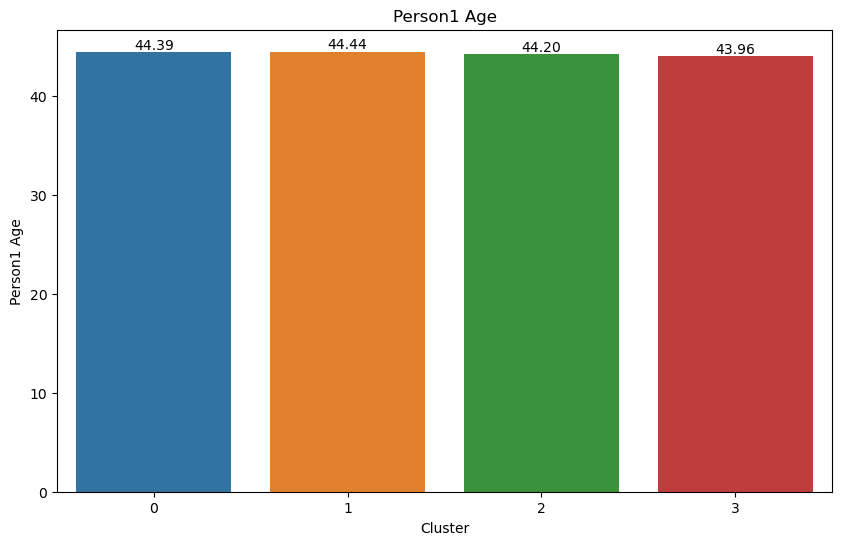

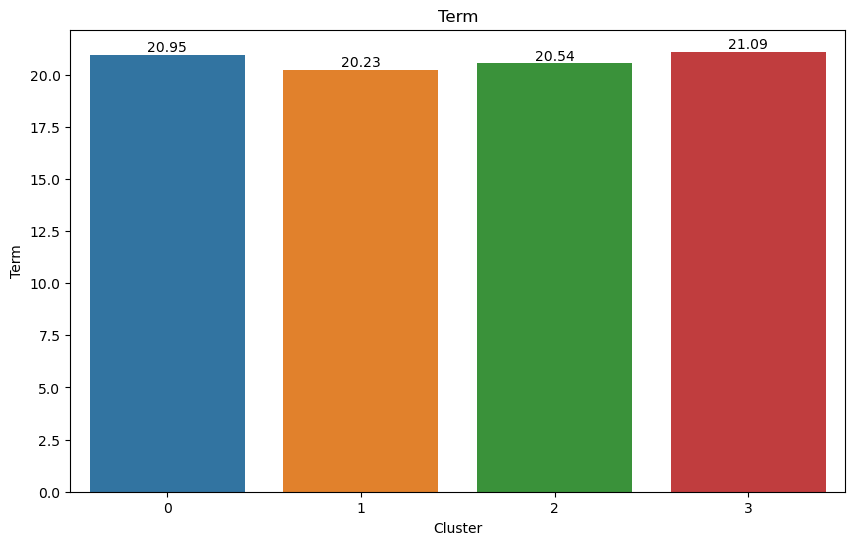

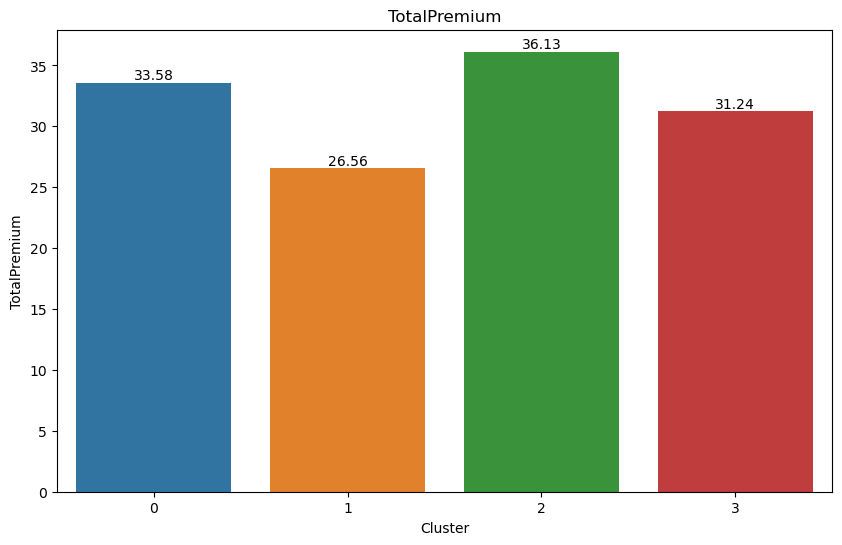

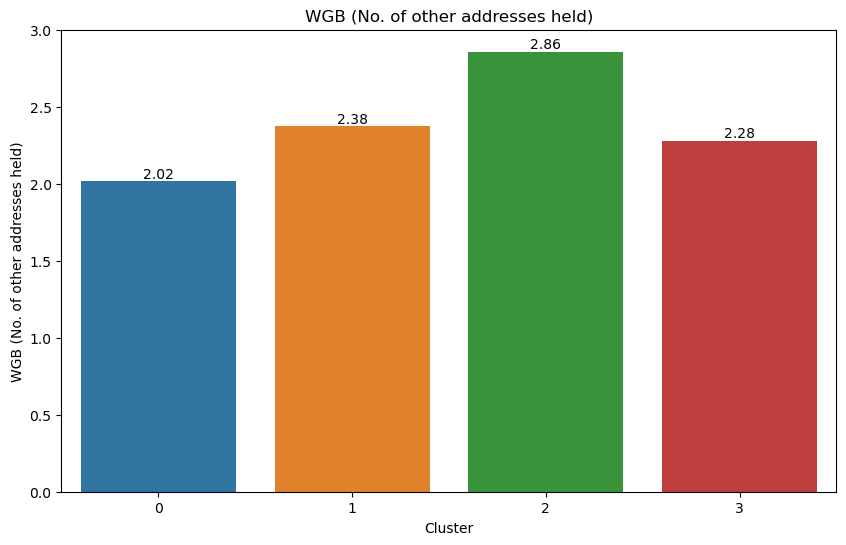

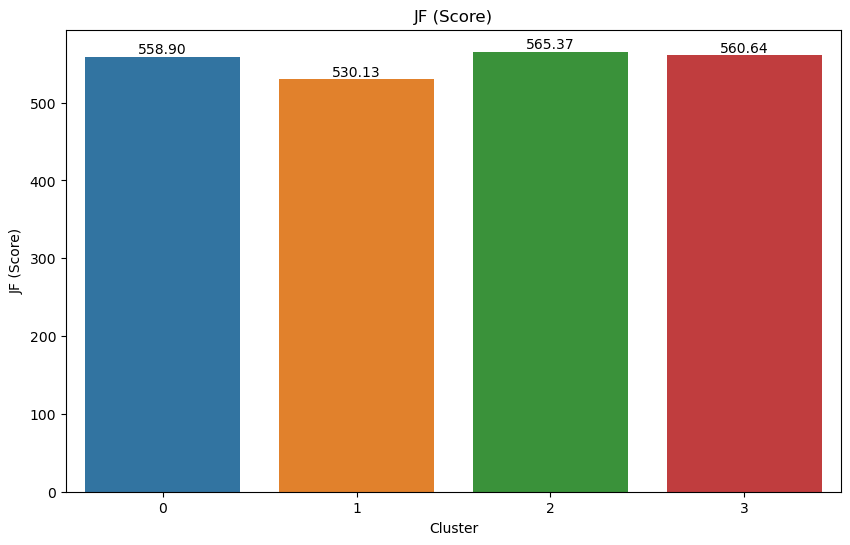

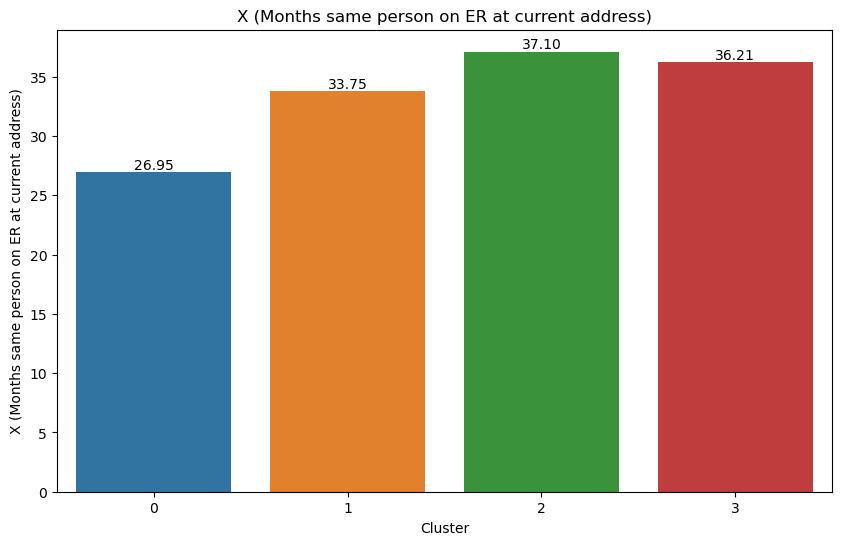

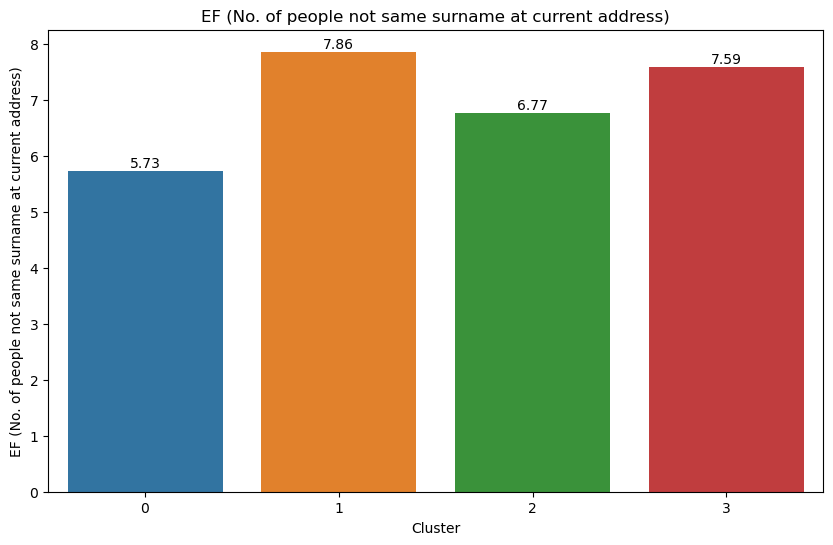

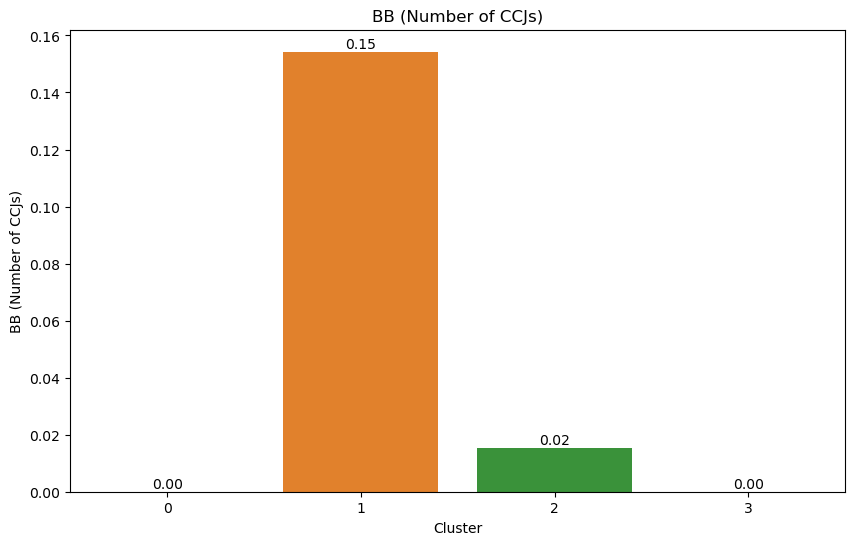

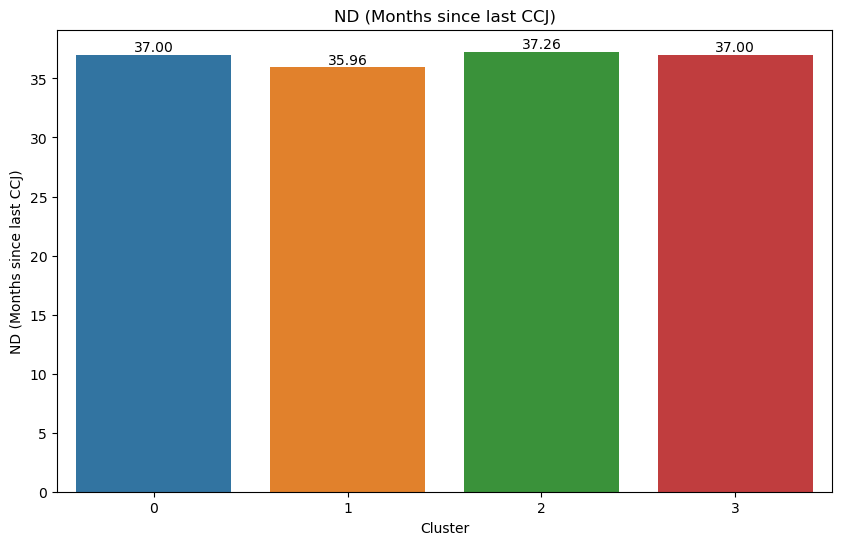

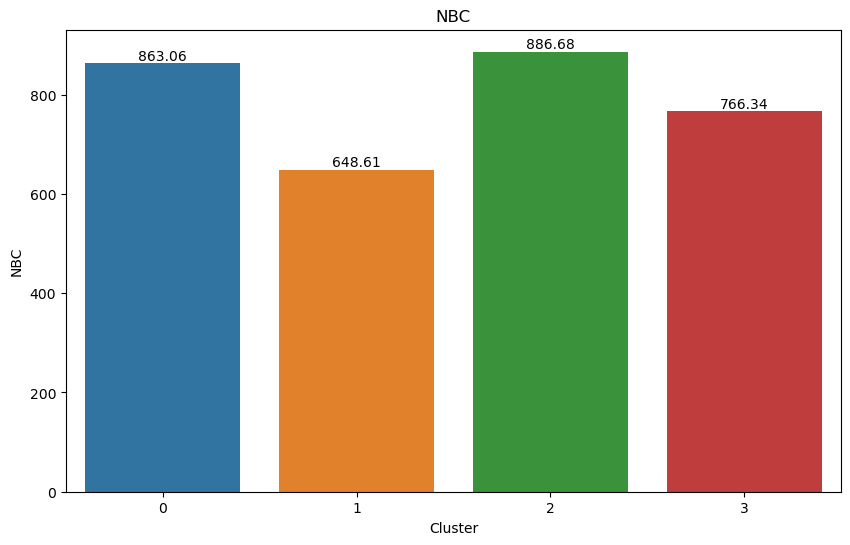

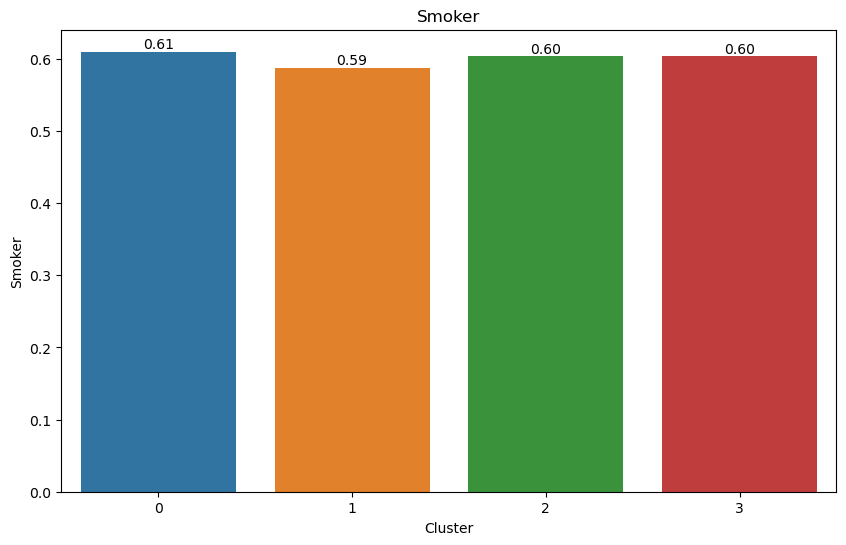

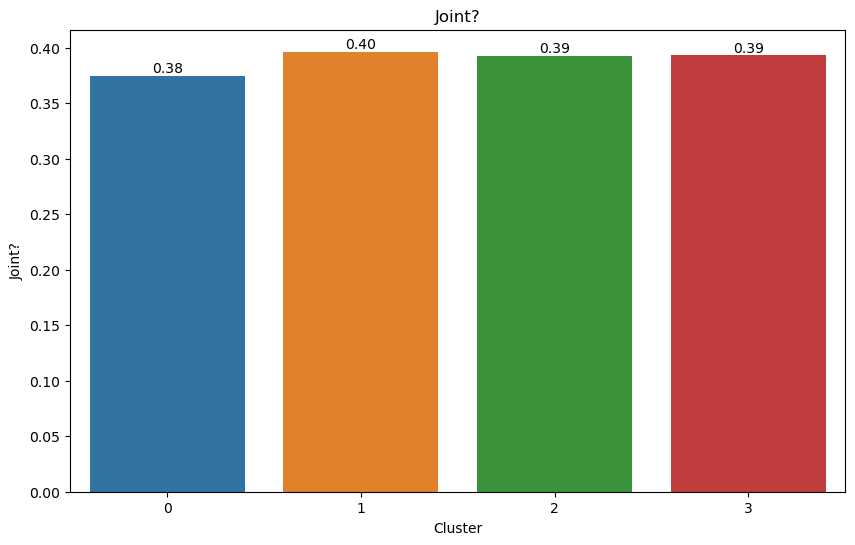

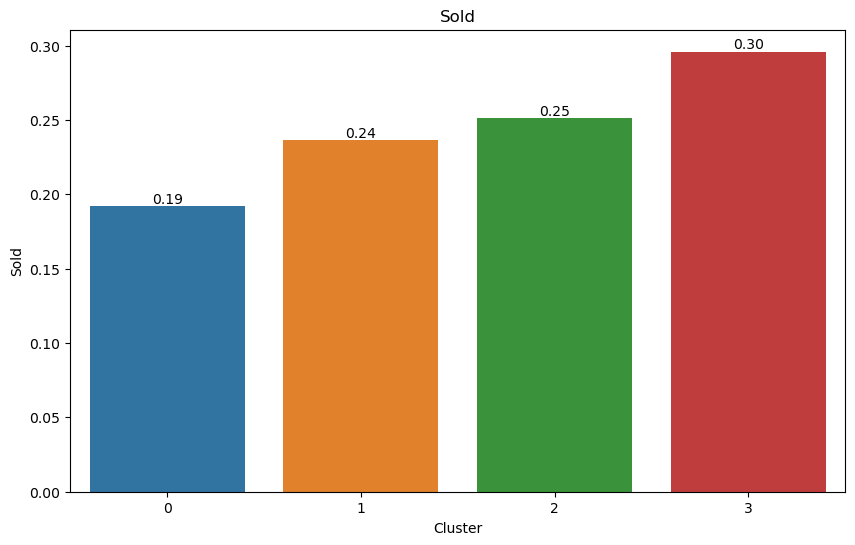

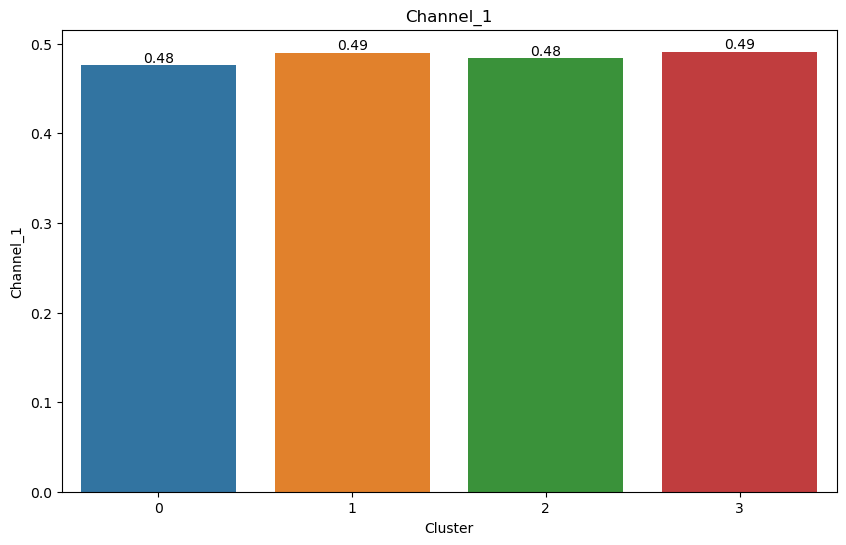

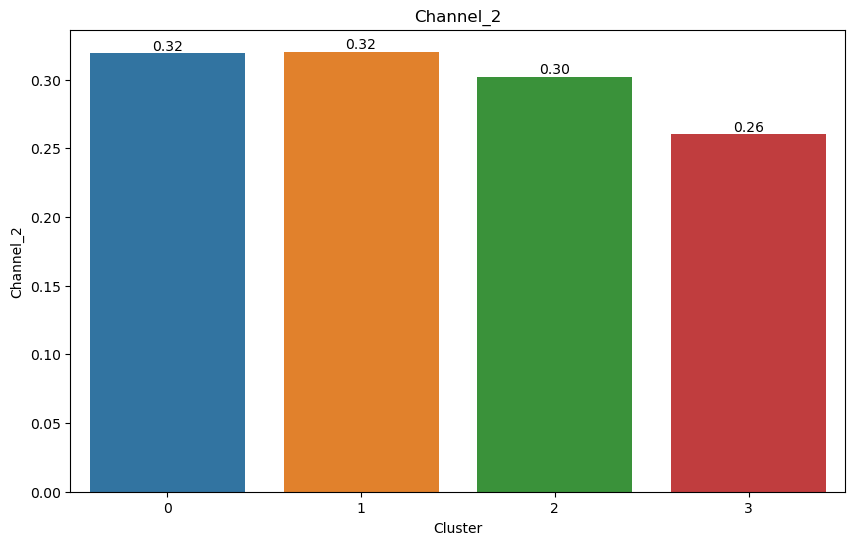

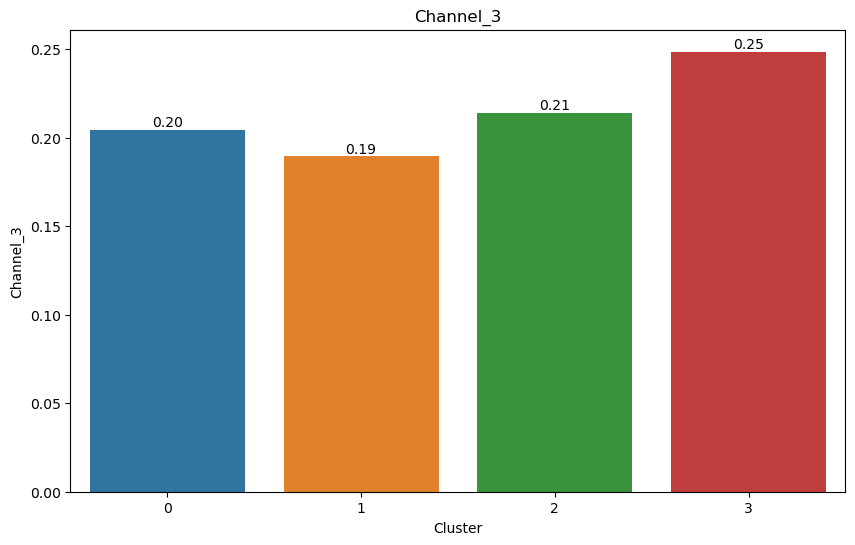

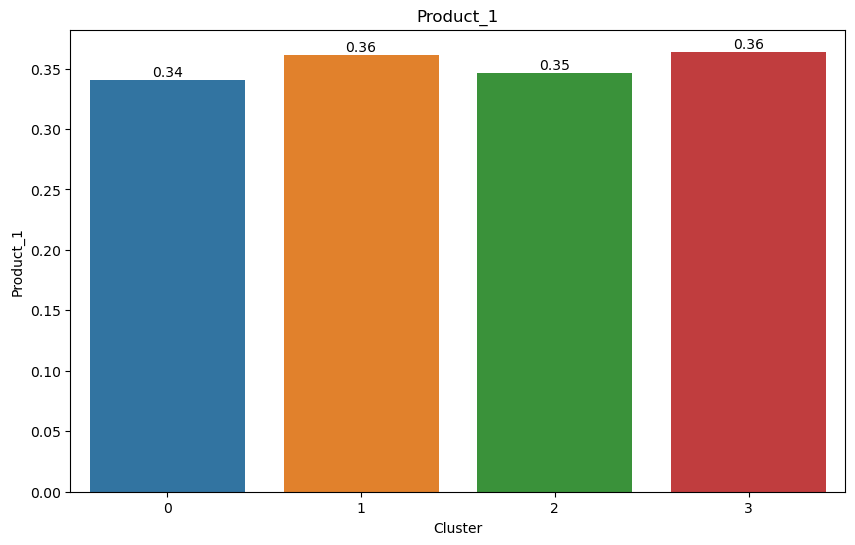

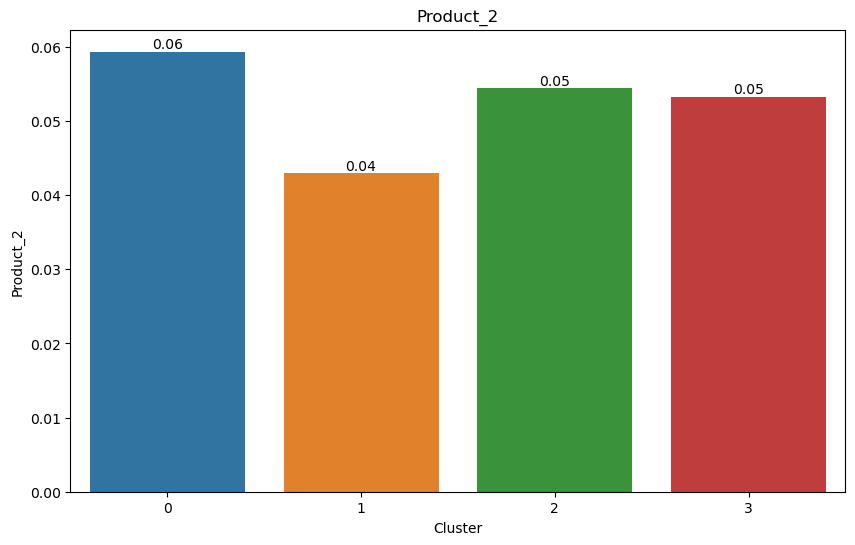

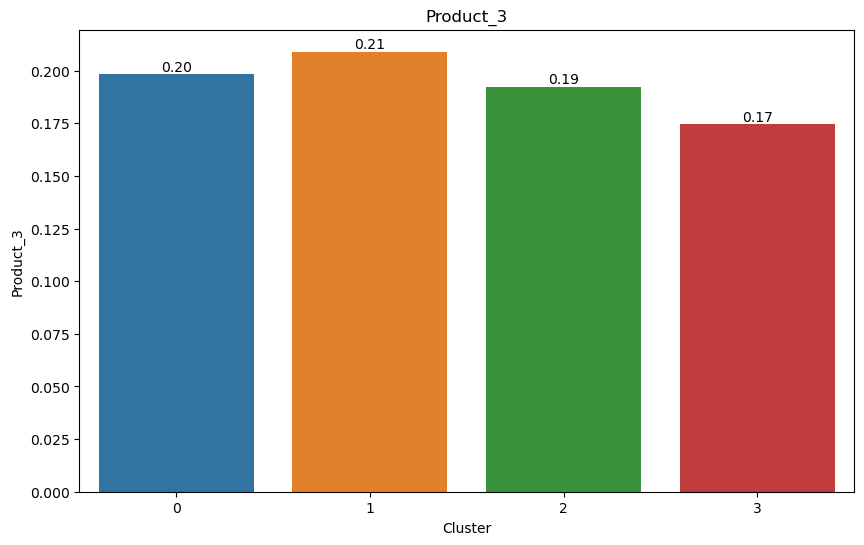

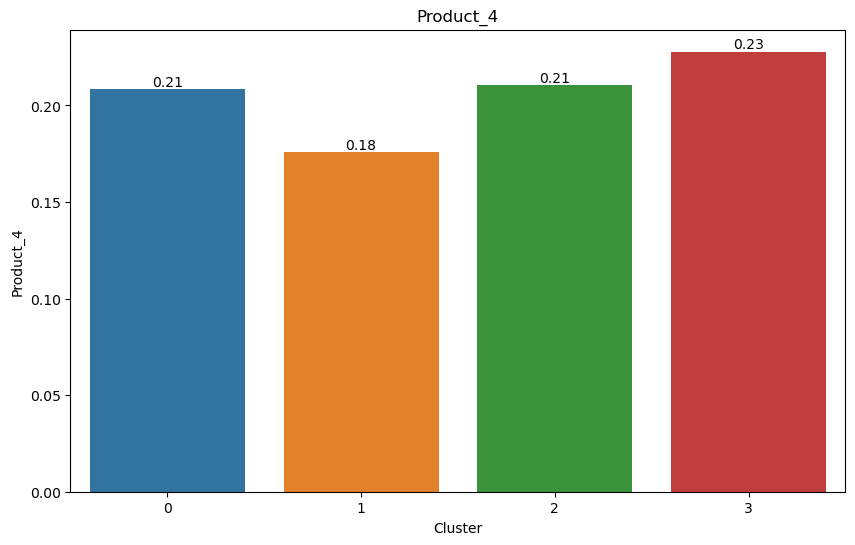

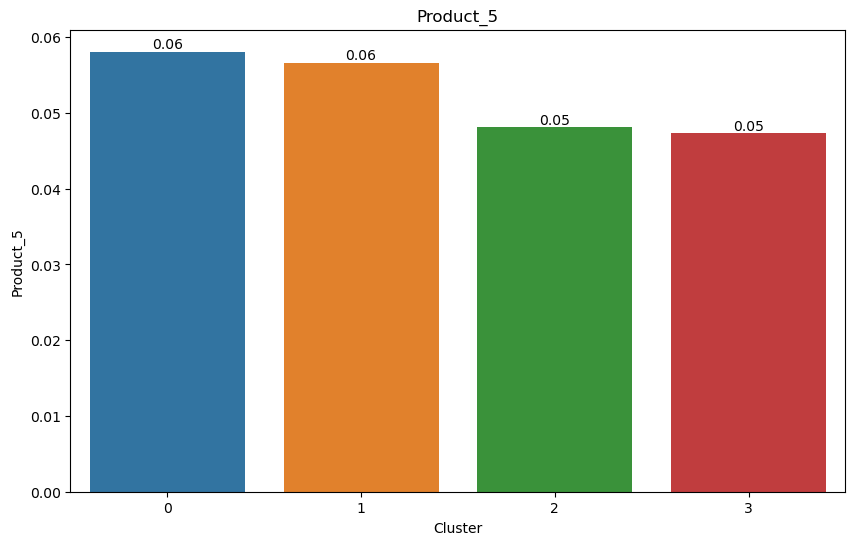

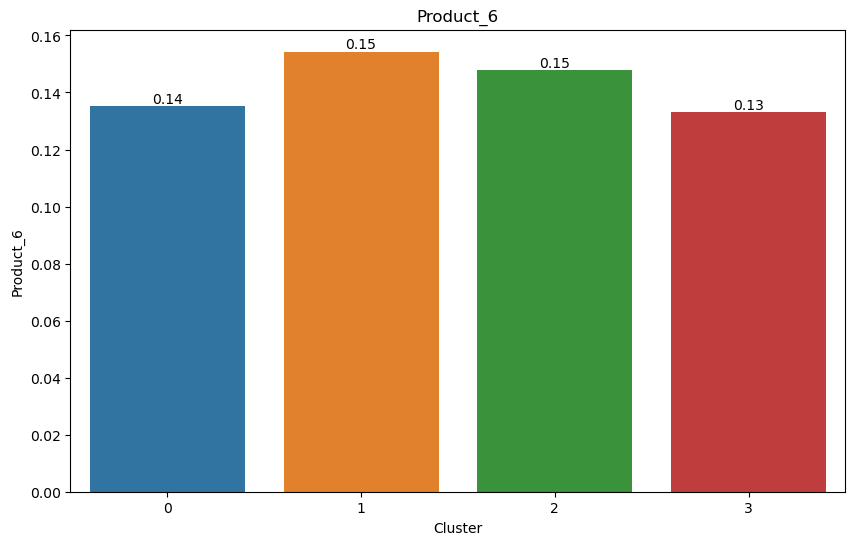

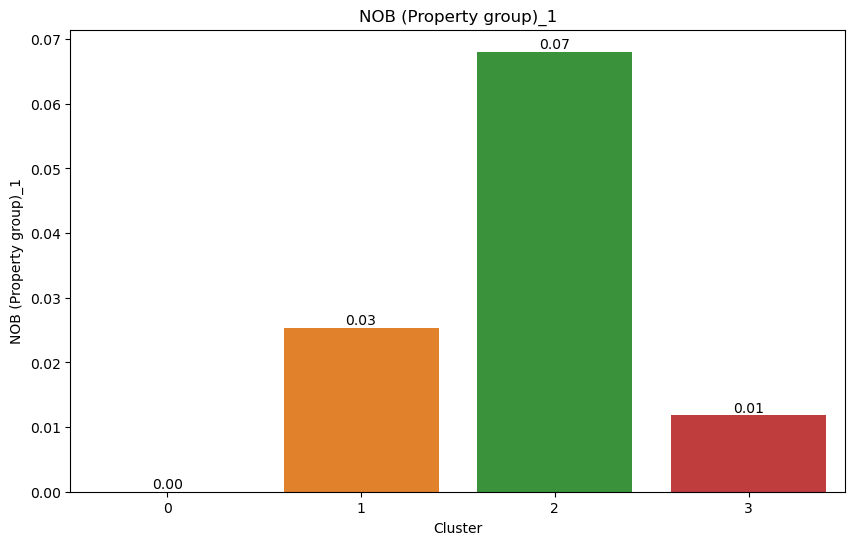

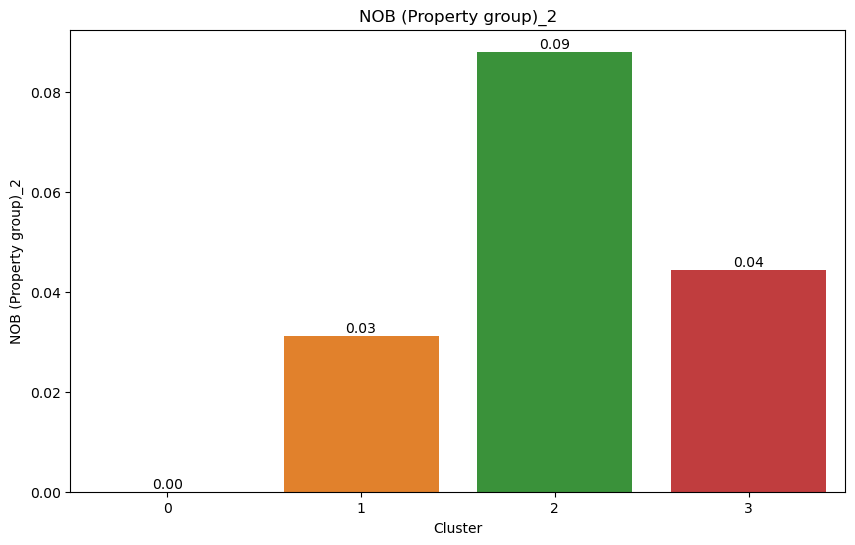

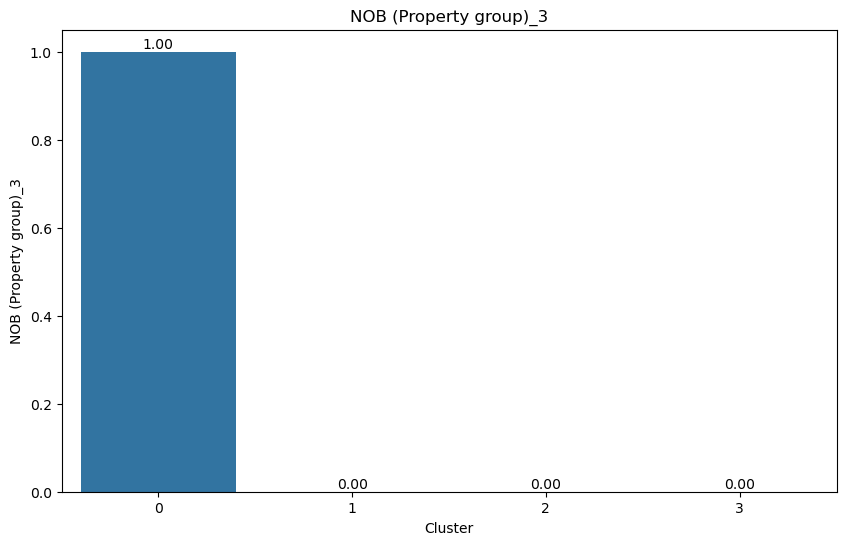

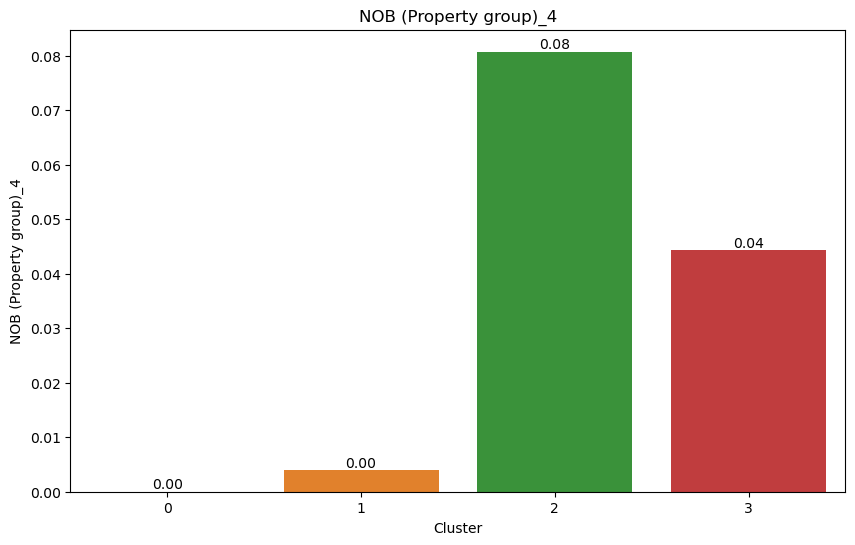

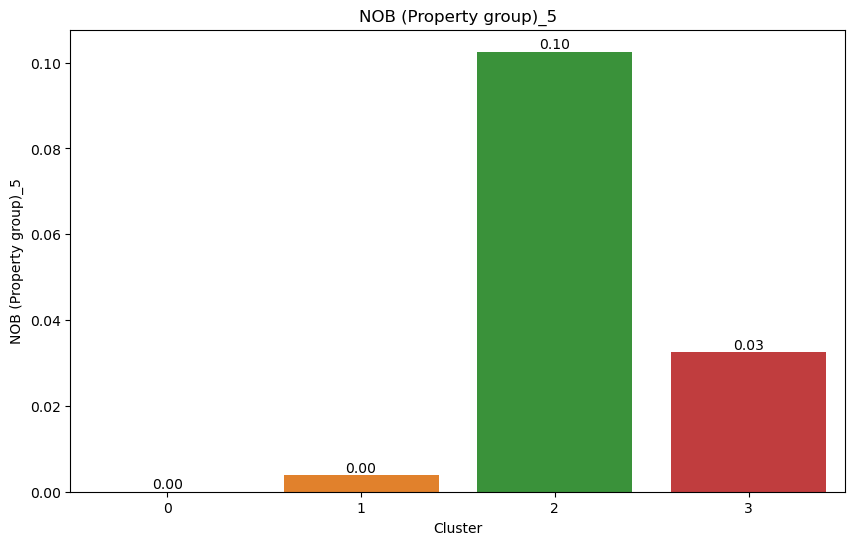

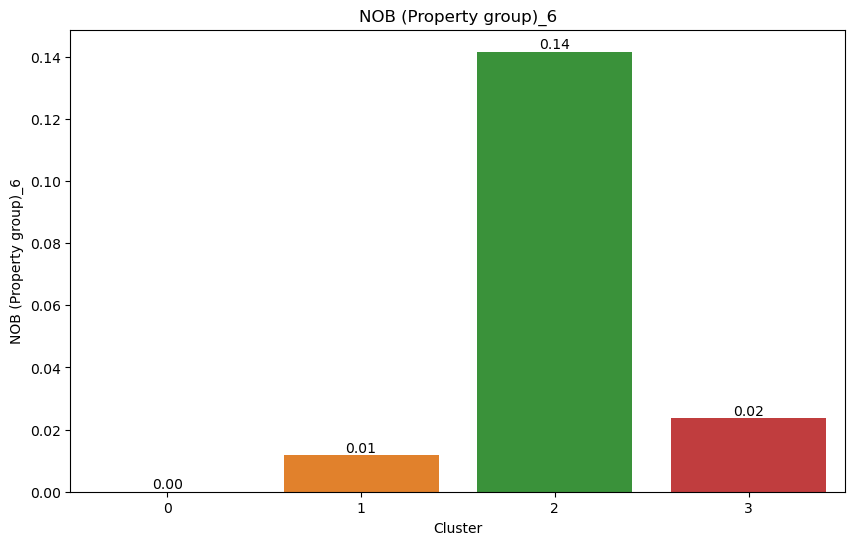

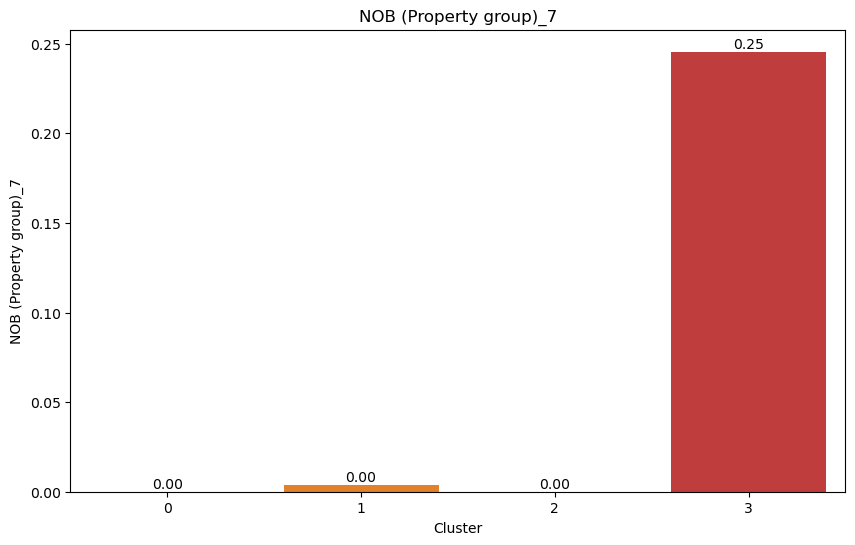

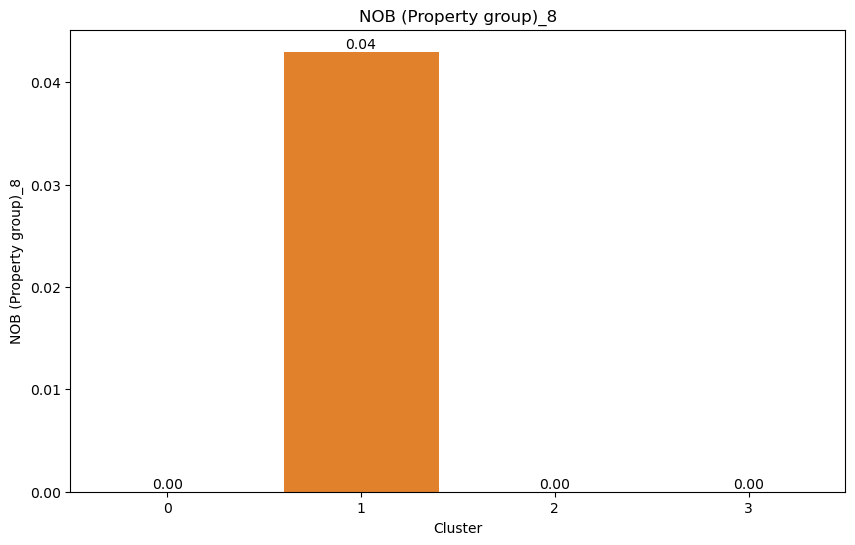

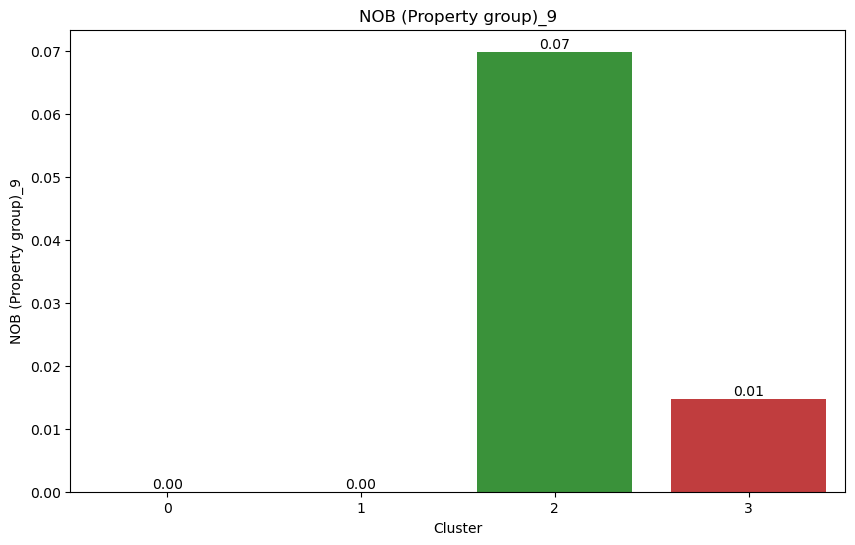

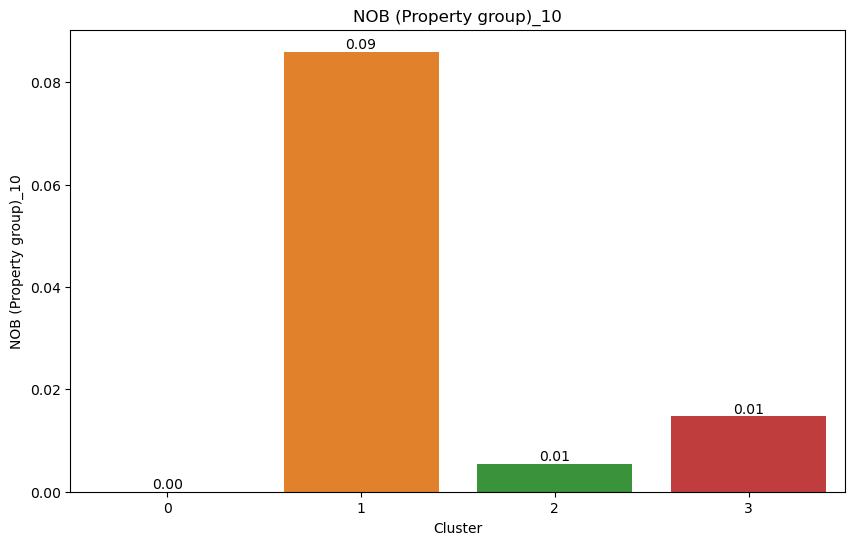

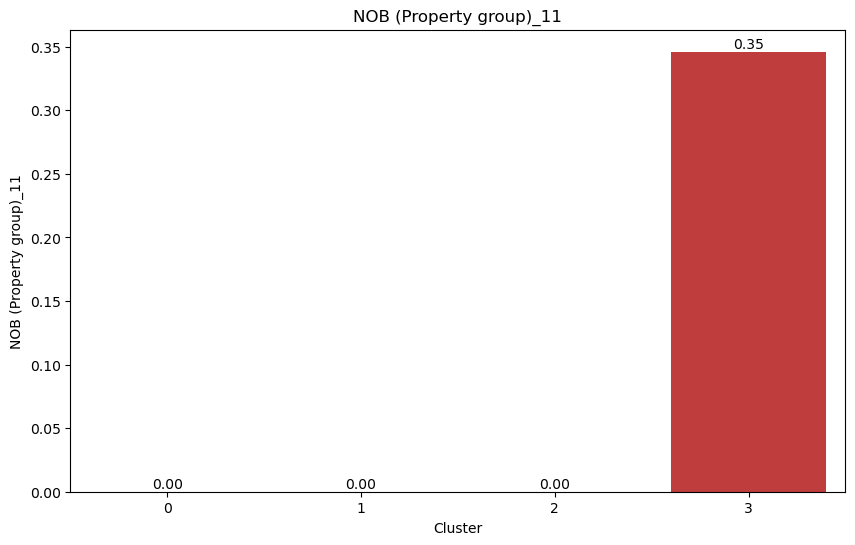

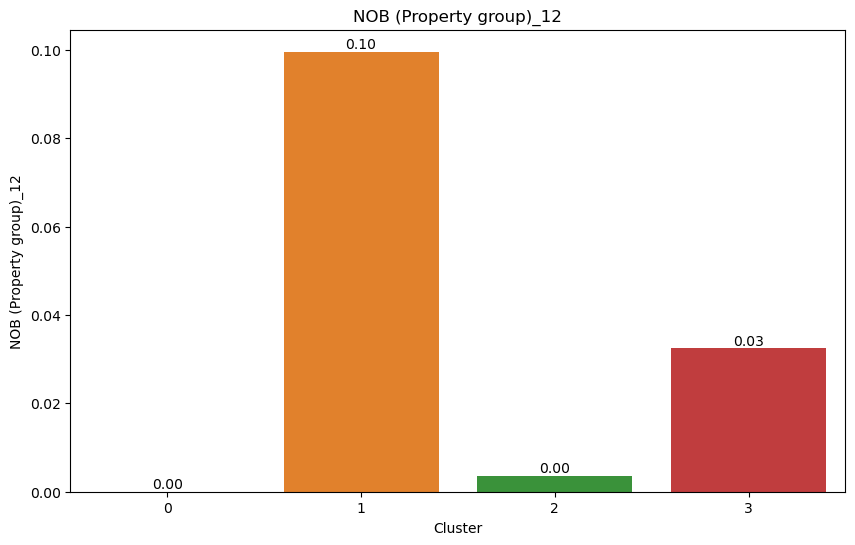

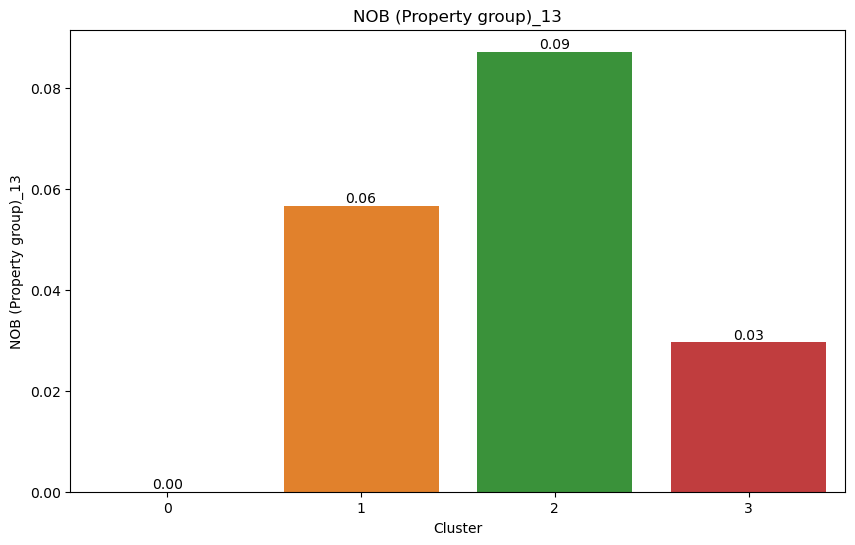

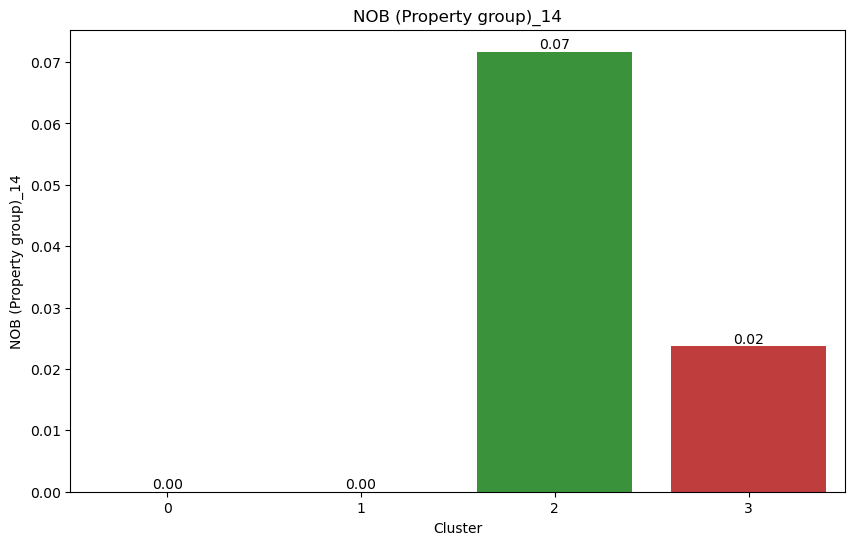

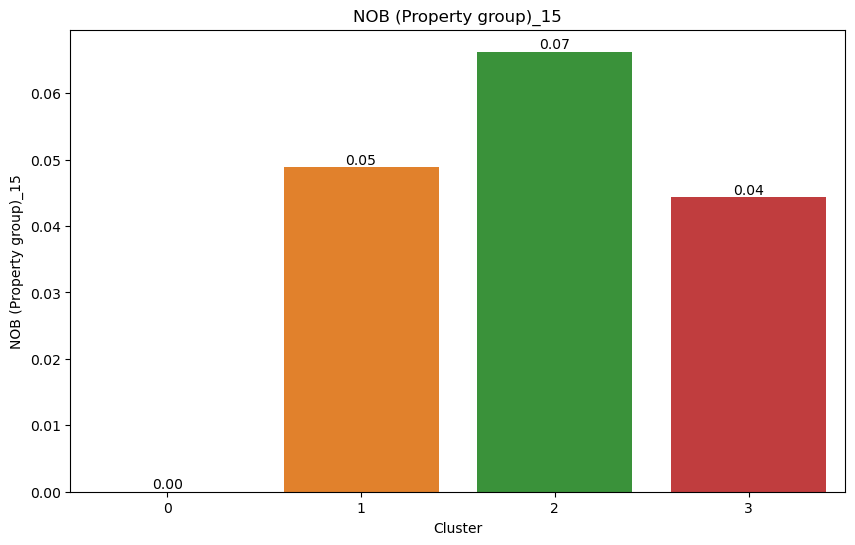

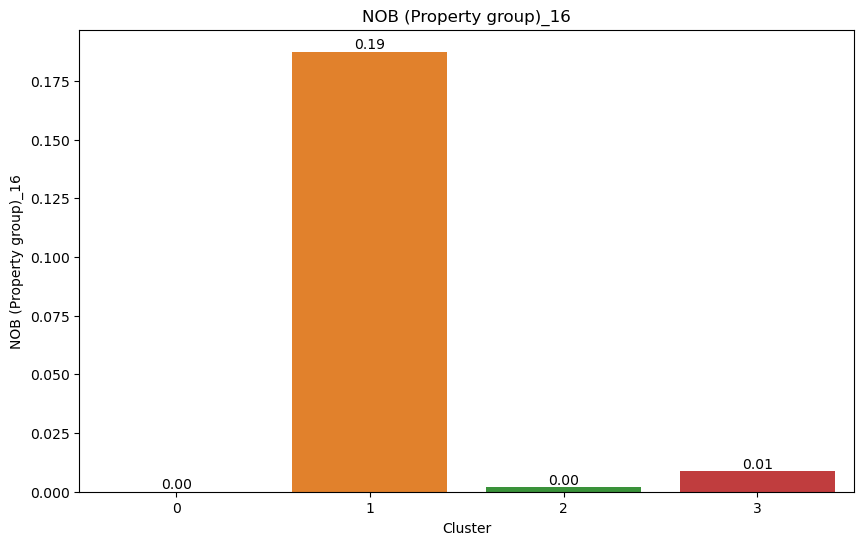

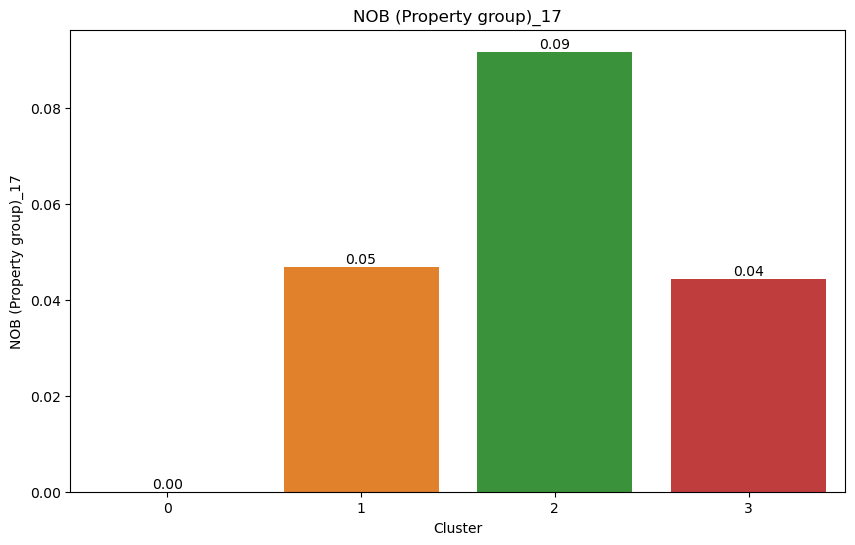

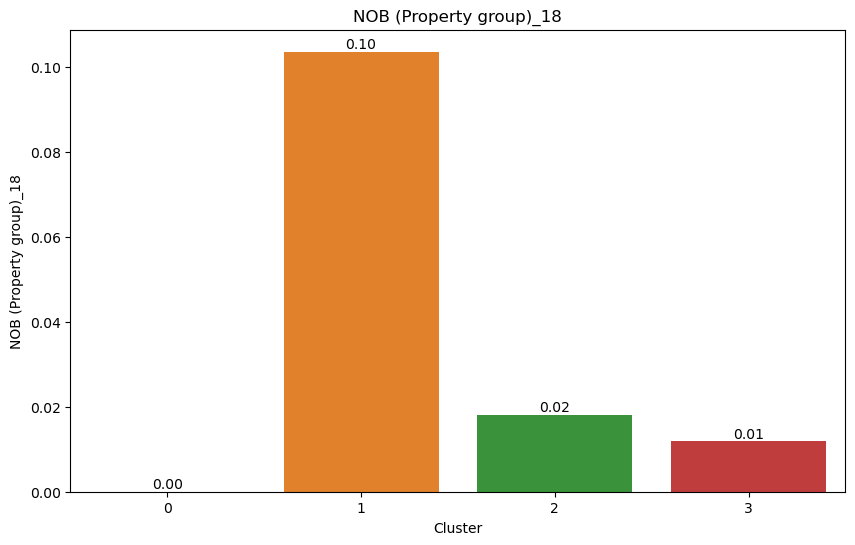

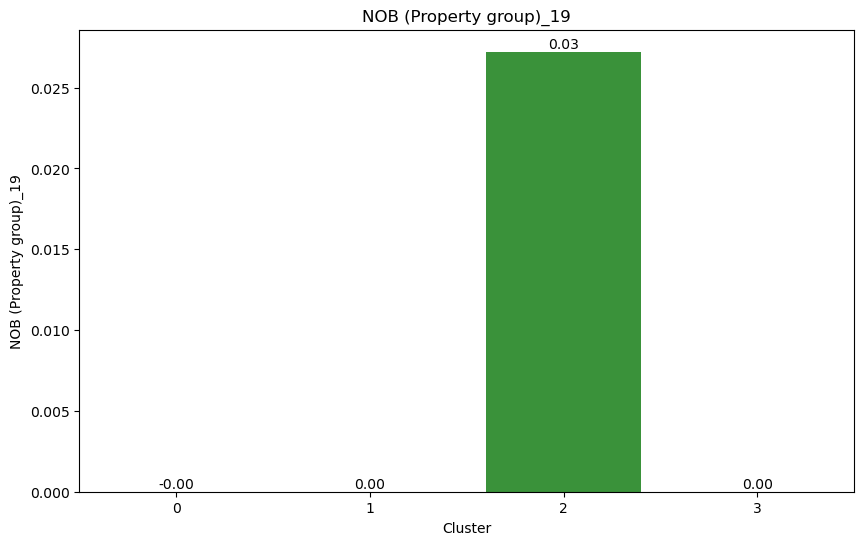

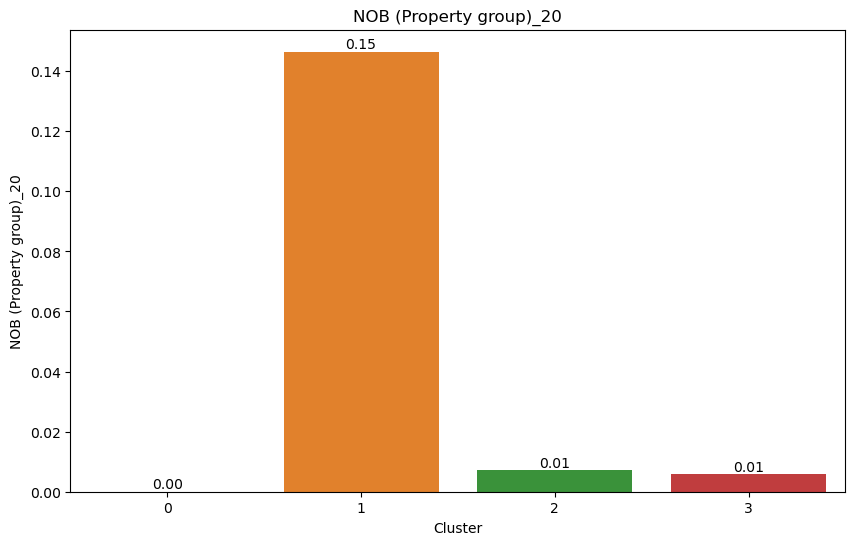

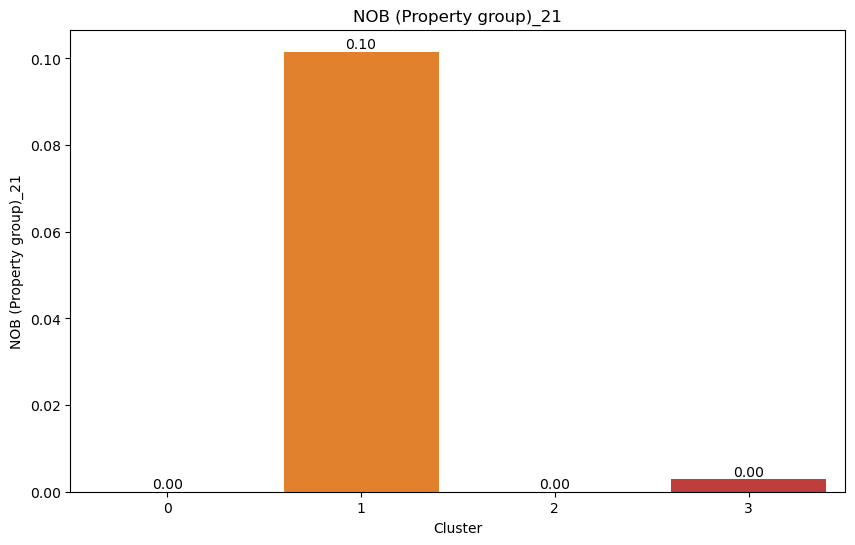

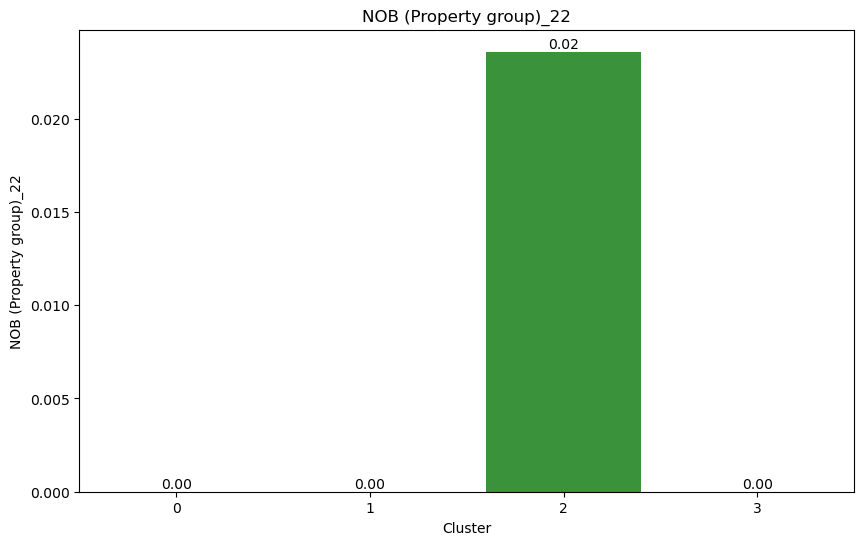

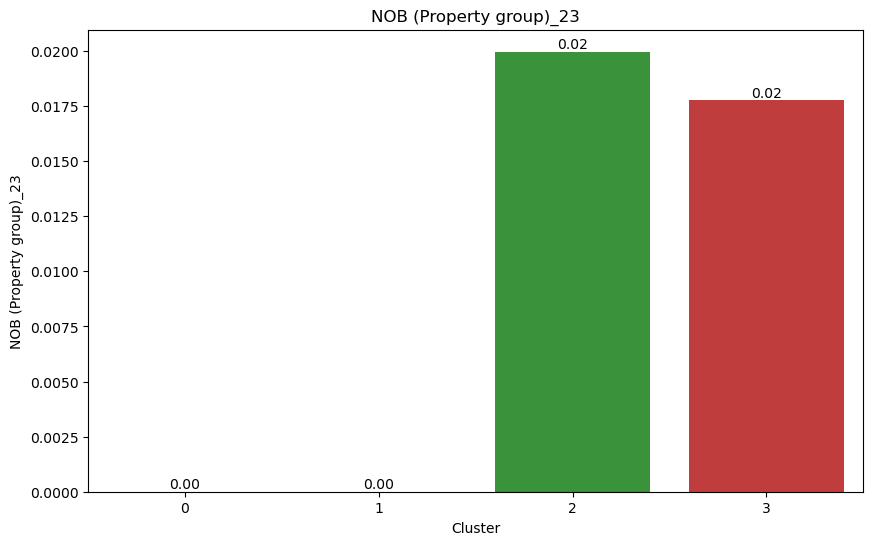

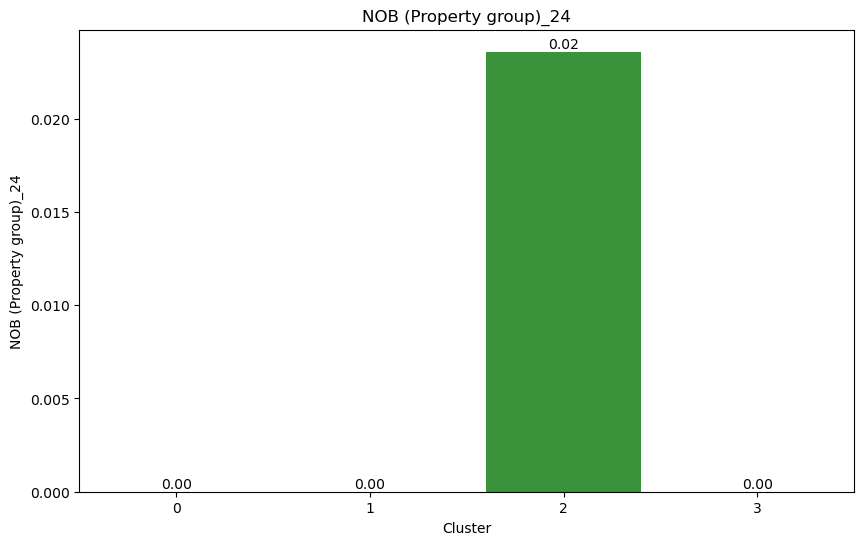

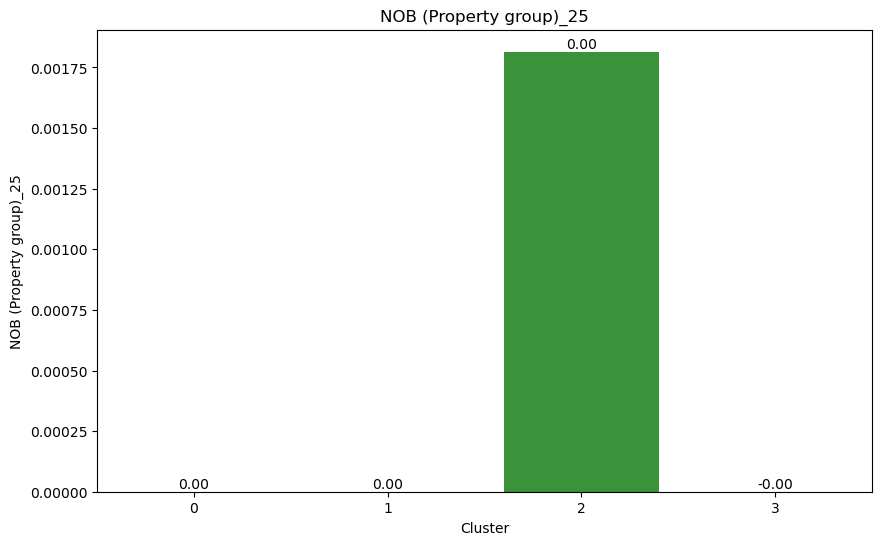

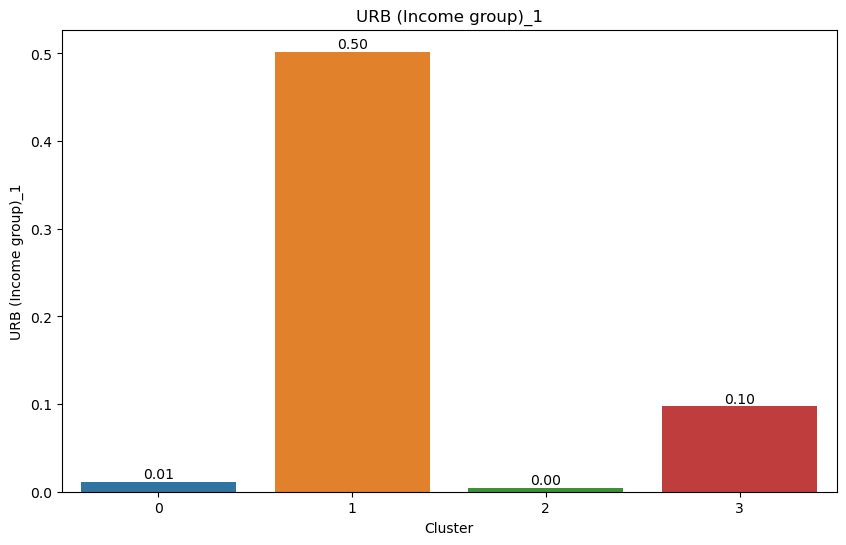

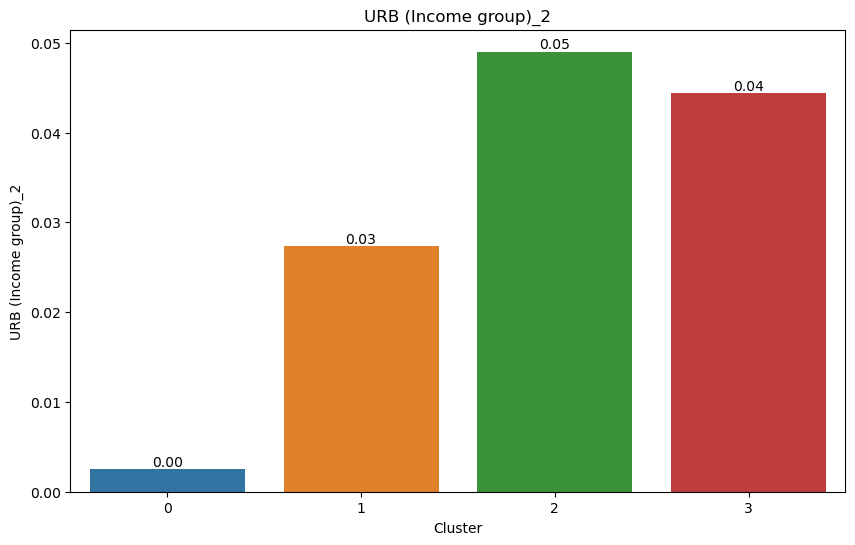

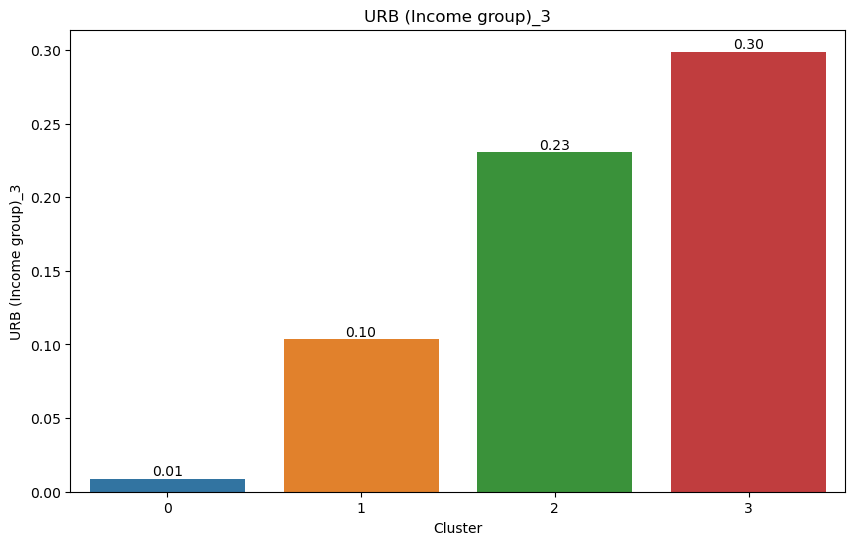

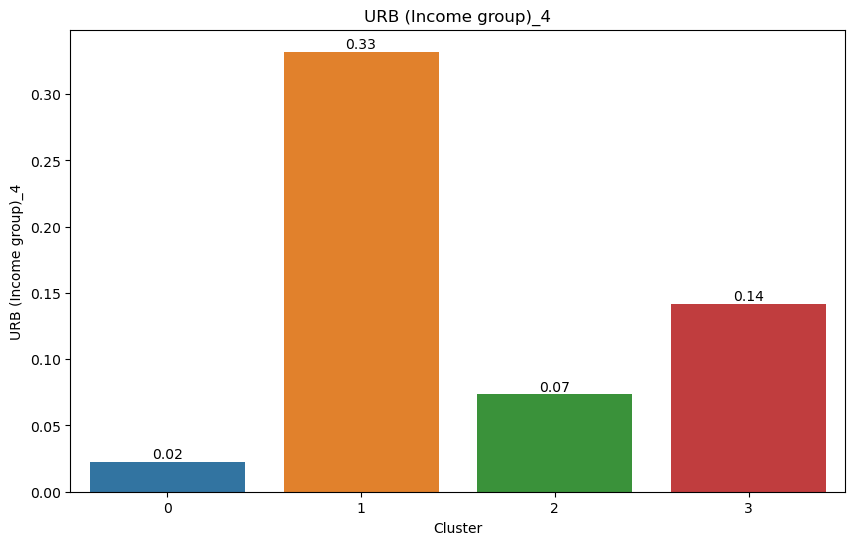

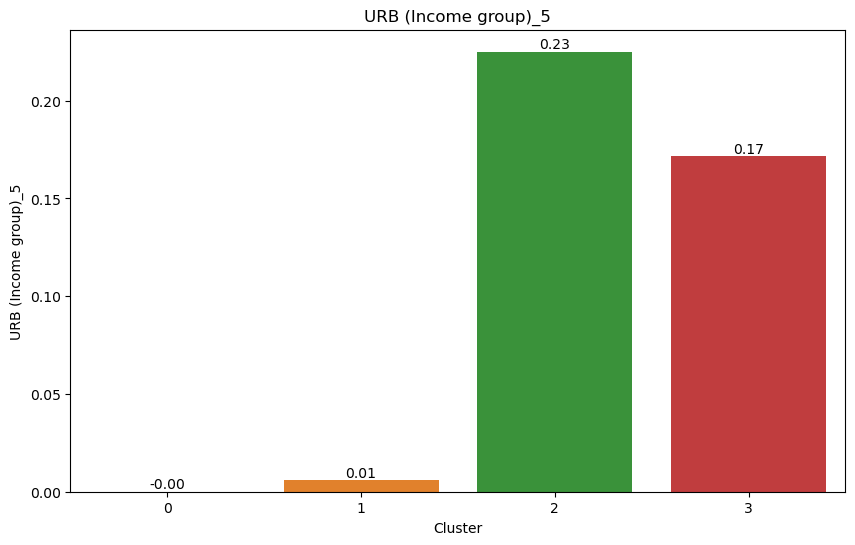

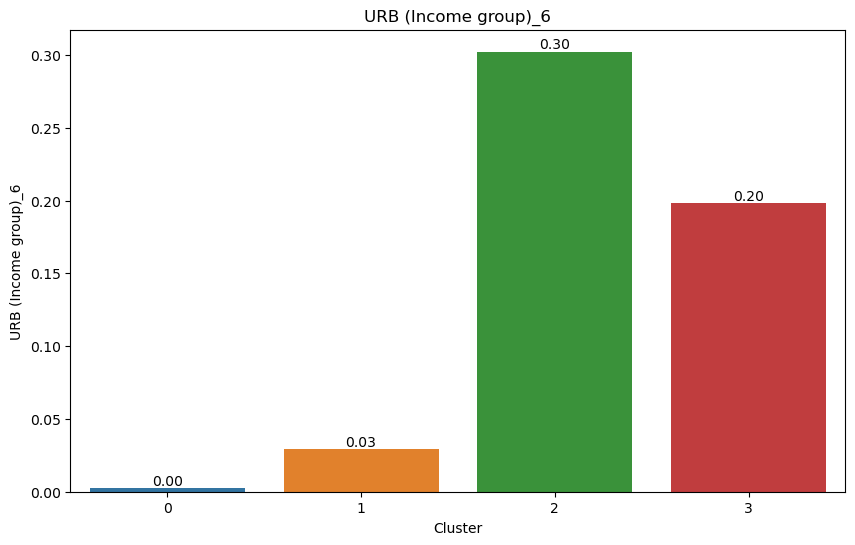

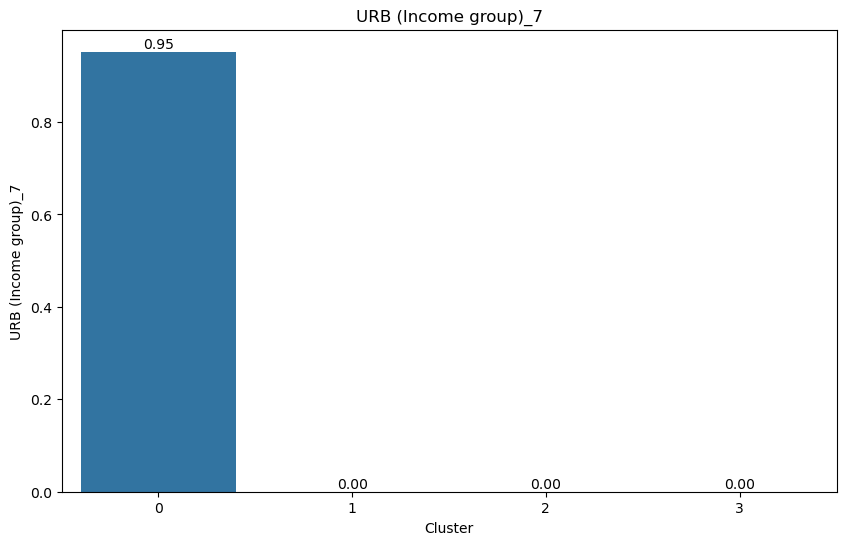

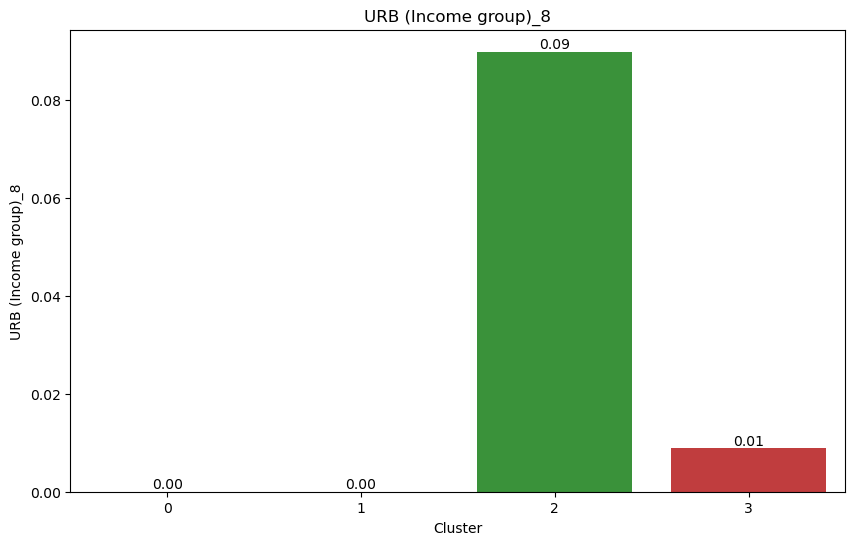

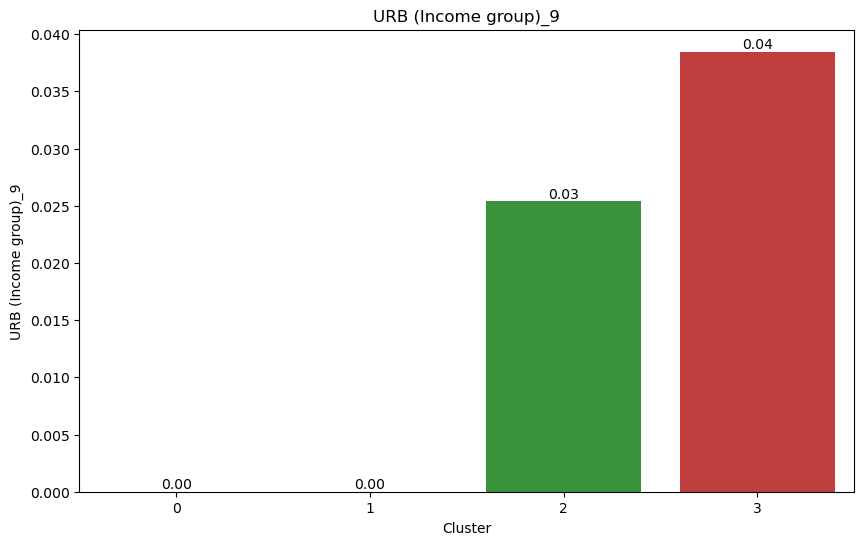

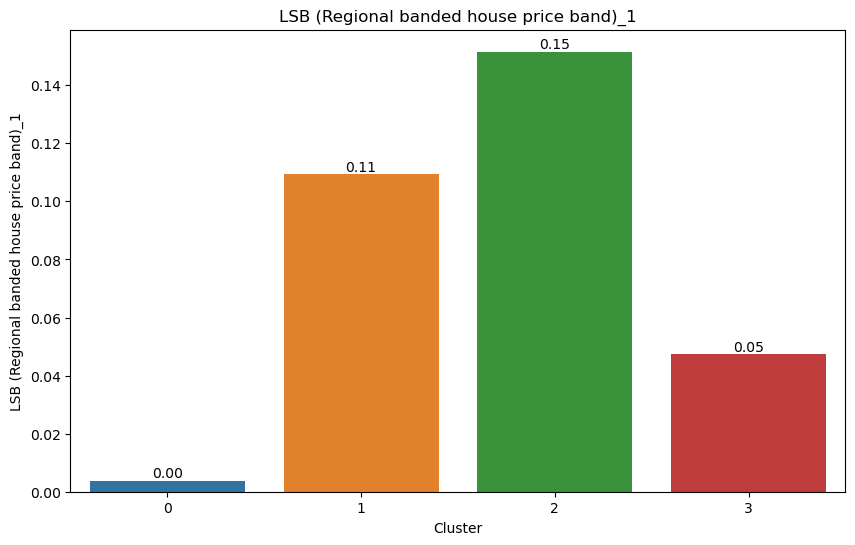

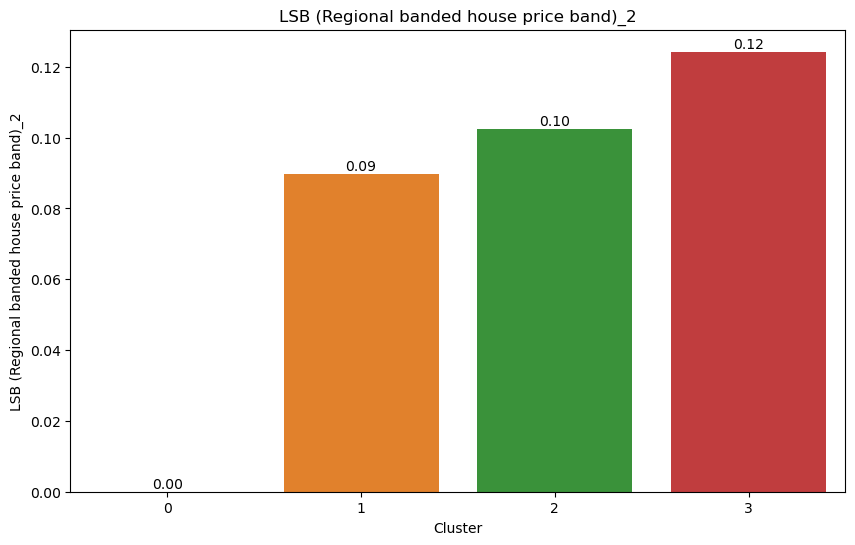

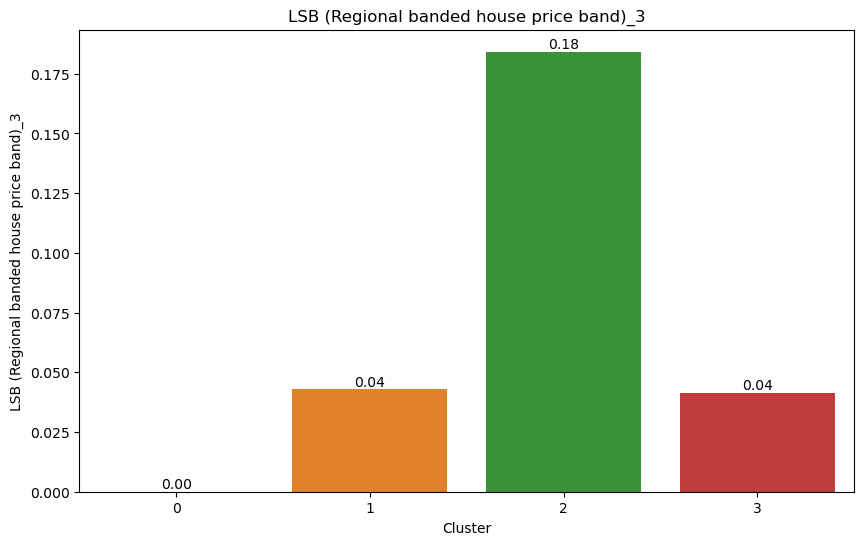

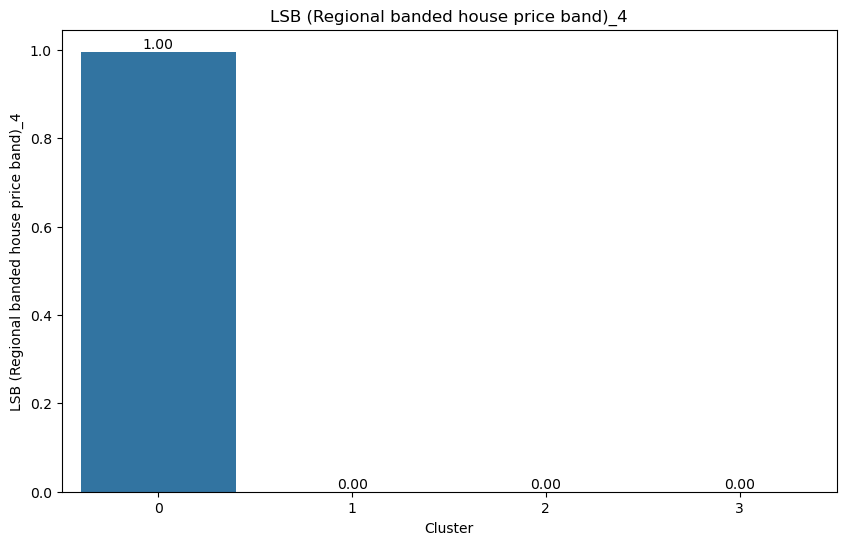

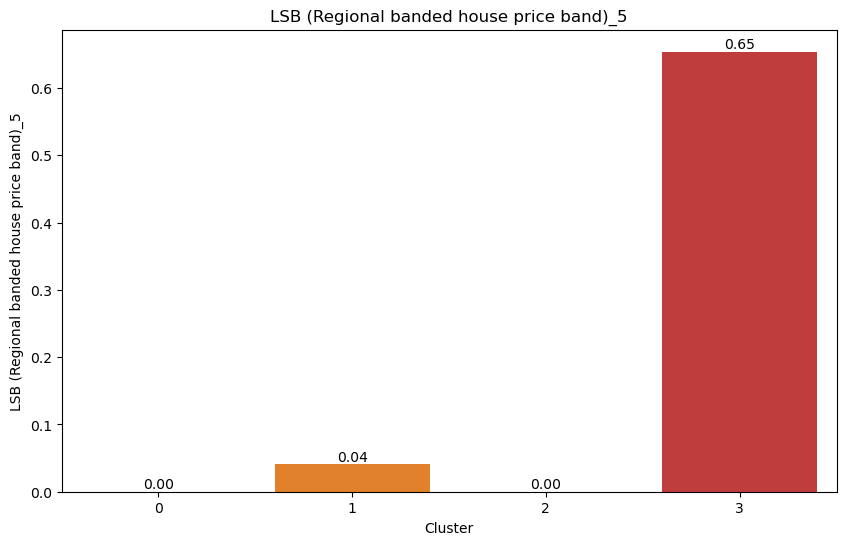

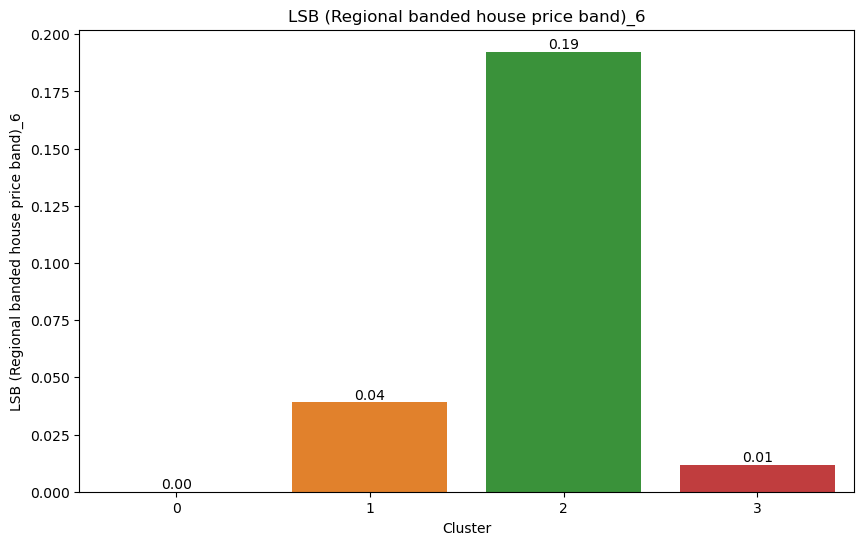

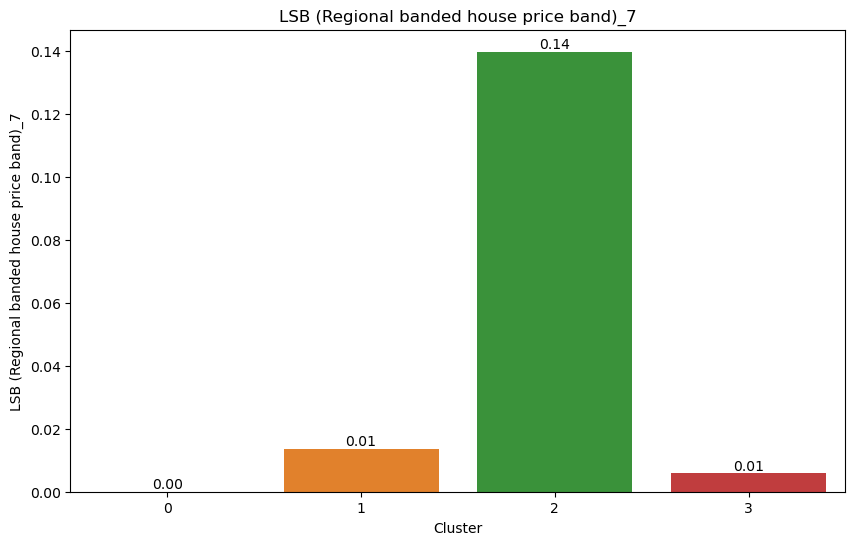

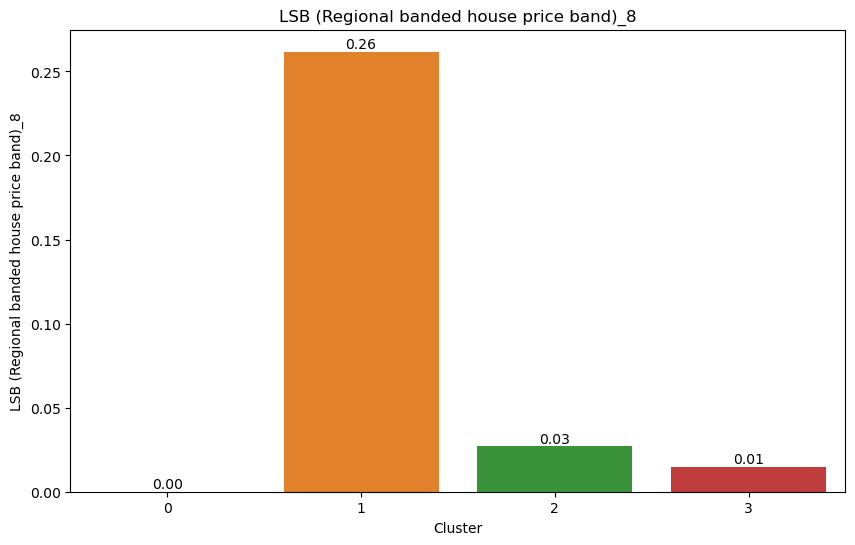

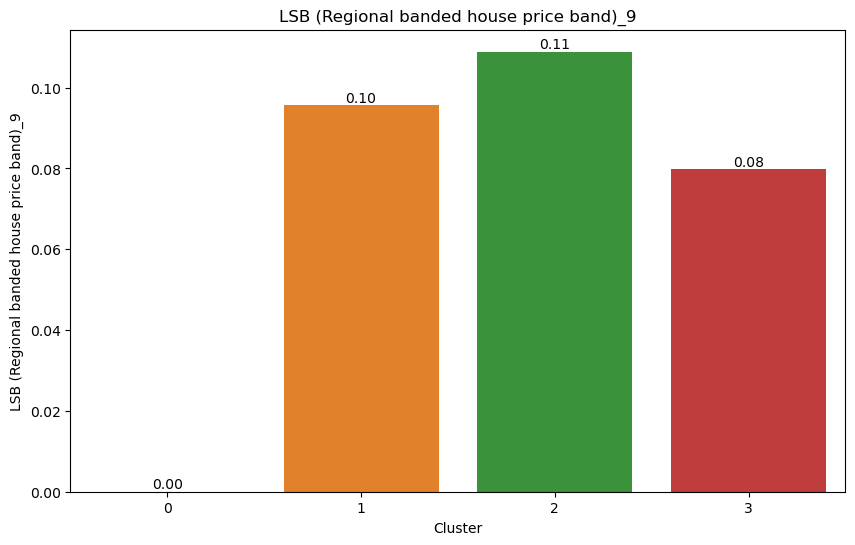

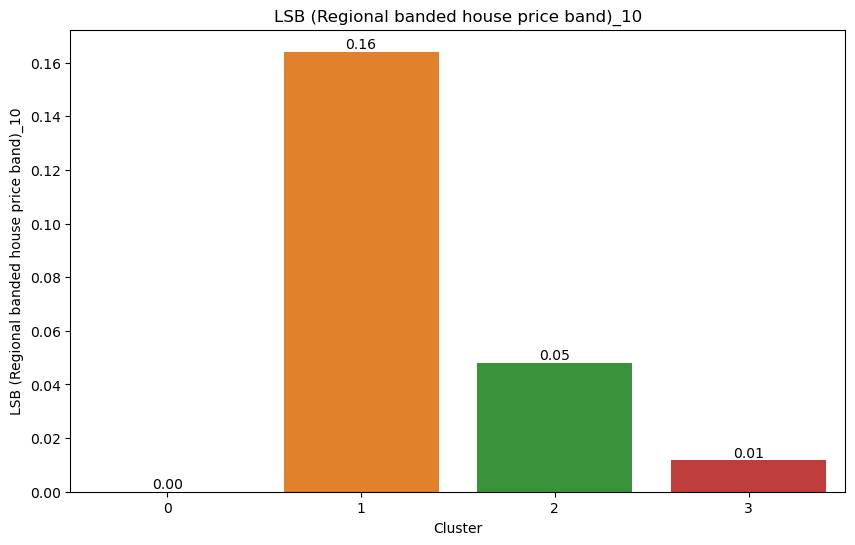

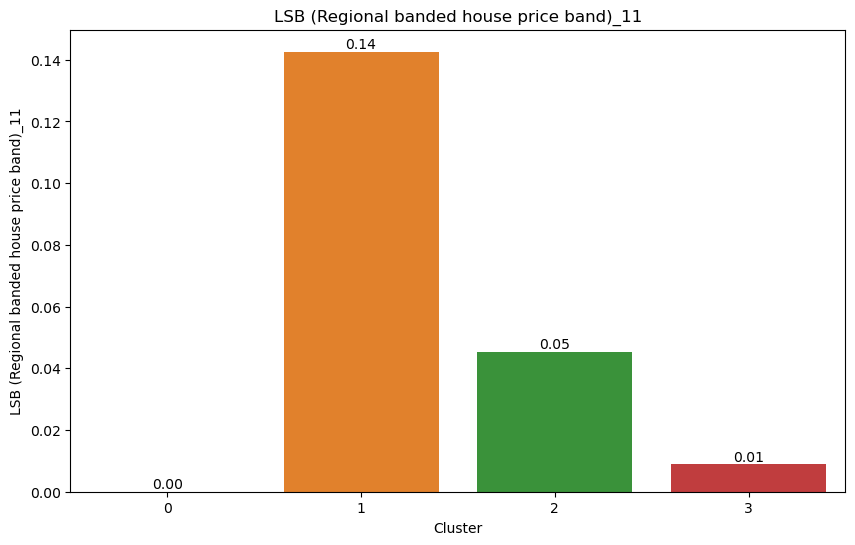

In [15]:
for feat in cluster_means_unscaled.columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create the barplot. Note: we use `ax=ax` so we can reference it later
    sns.barplot(
        x=cluster_means_unscaled.index, 
        y=cluster_means_unscaled[feat], 
        ax=ax
    )
    
    # Loop through each bar and add a text label
    for i, bar in enumerate(ax.patches):
        # Get the height (value) of the bar
        height = bar.get_height()
        # Place text at the top of each bar
        ax.text(
            bar.get_x() + bar.get_width() / 2.0,   # x-position
            height,                               # y-position
            f"{height:.2f}",                     # text (rounded to 2 decimals)
            ha="center", 
            va="bottom"
        )
    
    ax.set_title(feat)
    plt.show()


In [19]:
import math

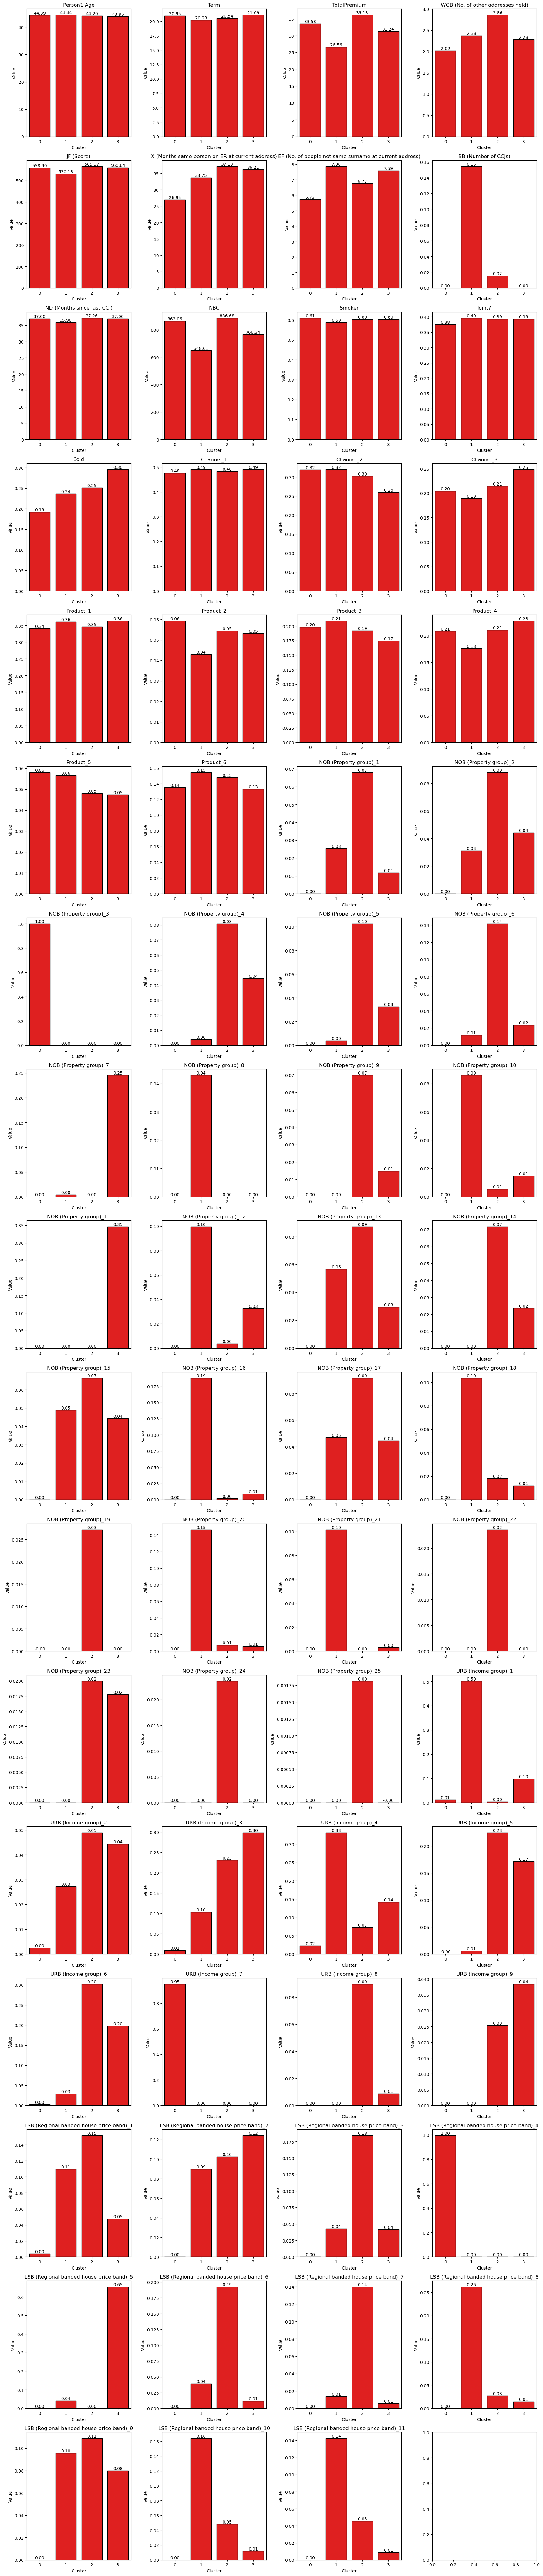

In [ ]:
def plot_cluster_features(cluster_means_unscaled):
    num_feats = len(cluster_means_unscaled.columns)
    cols = 4  
    rows = math.ceil(num_feats / cols)  
    
    fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
    axes = axes.flatten()
    
    for i, feat in enumerate(cluster_means_unscaled.columns):
        sns.barplot(
            x=cluster_means_unscaled.index, 
            y=cluster_means_unscaled[feat], 
            ax=axes[i],
            color='red',
            edgecolor='black'
        )
        
        for bar in axes[i].patches:
            height = bar.get_height()
            axes[i].text(
                bar.get_x() + bar.get_width() / 2.0, 
                height, 
                f"{height:.2f}", 
                ha="center", 
                va="bottom"
            )
        
        axes[i].set_title(feat)
        axes[i].set_xlabel("Cluster")
        axes[i].set_ylabel("Value")
    
    plt.tight_layout()
    plt.show()


plot_cluster_features(cluster_means_unscaled)